# Comparaison RandomForest, GradientBoosting et XGBoost

Analyse des capacités de chaque modèle à capturer la non-linéarité des données.

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 1. Génération des données non-linéaires

In [334]:
# Génération de données non-linéaires (moons dataset)
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Séparation en ensembles d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")

Ensemble d'entraînement: 210 échantillons
Ensemble de test: 90 échantillons


## 2. Entraînement des modèles

In [335]:
# Création des modèles
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')
}

# Entraînement des modèles
trained_models = {}
for name, model in models.items():
    print(f"Entraînement de {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} entraîné avec succès!")

Entraînement de RandomForest...
RandomForest entraîné avec succès!
Entraînement de GradientBoosting...
GradientBoosting entraîné avec succès!
Entraînement de XGBoost...
XGBoost entraîné avec succès!


## 3. Calcul de l'accuracy sur l'ensemble de test

In [336]:
# Calcul de l'accuracy pour chaque modèle
accuracies = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} - Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

RandomForest - Accuracy: 0.9333 (93.33%)
GradientBoosting - Accuracy: 0.9222 (92.22%)
XGBoost - Accuracy: 0.9222 (92.22%)


## 4. Génération de la grille pour les frontières de décision

In [337]:
# Création de la grille couvrant l'espace des données
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # résolution de la grille

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Points de la grille
grid_points = np.c_[xx.ravel(), yy.ravel()]
print(f"Grille créée: {grid_points.shape[0]} points")

Grille créée: 49025 points


## 5. Visualisation des frontières de décision

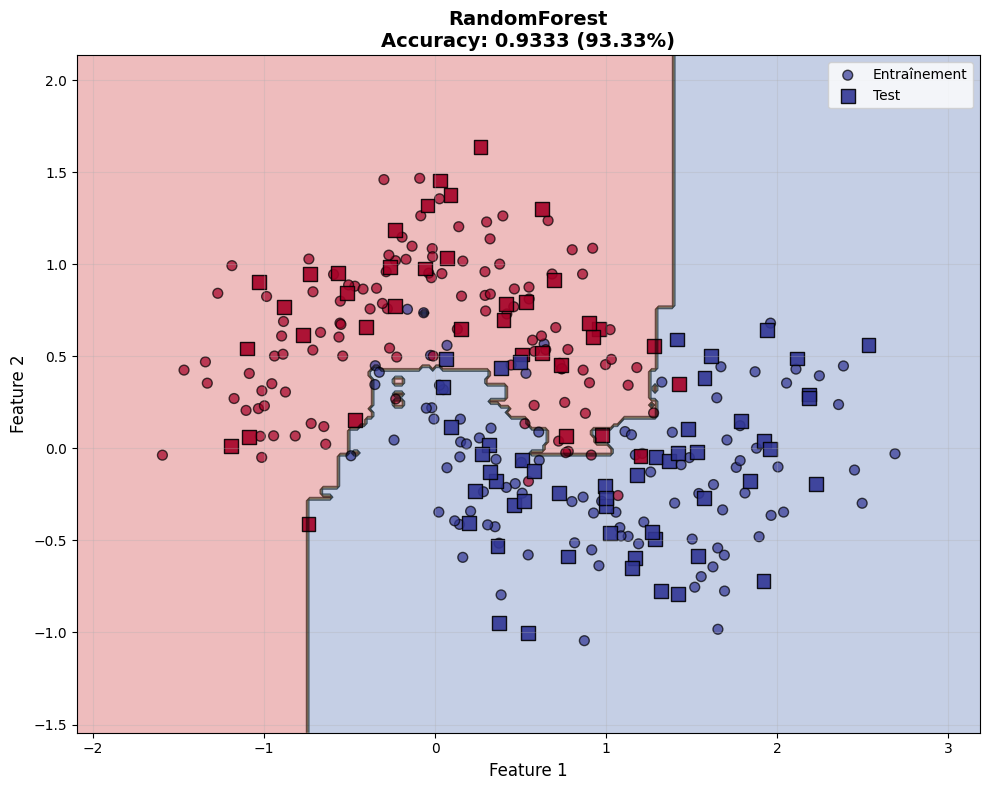

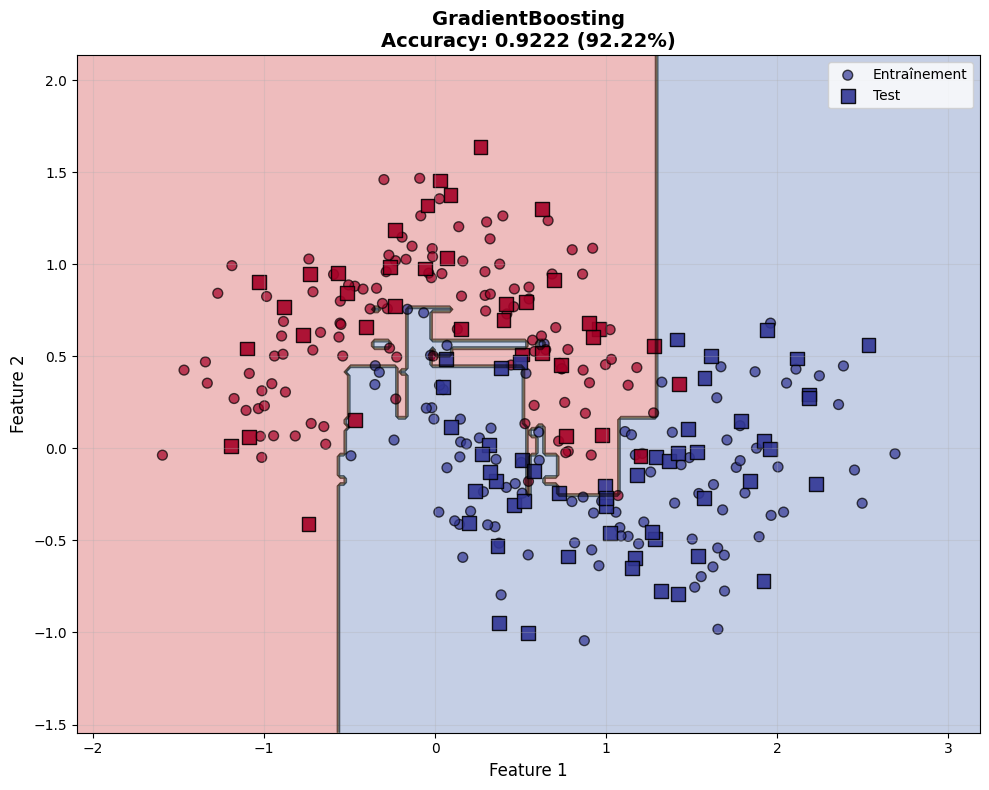

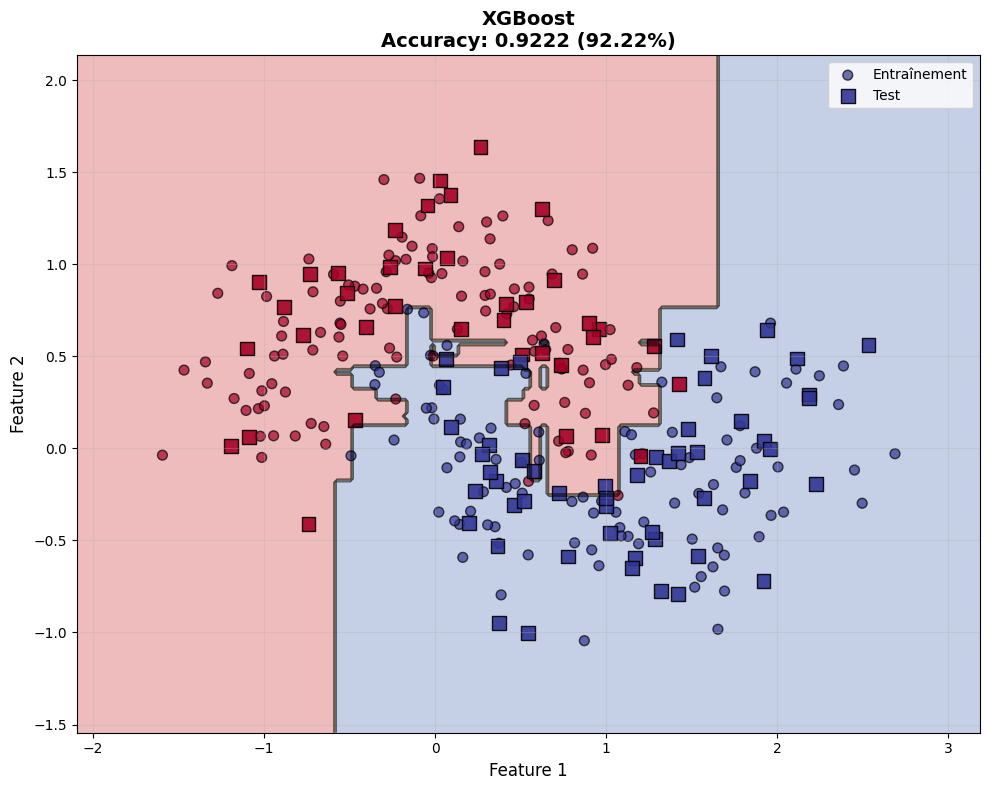

In [338]:
def plot_decision_boundary(model, X_train, y_train, X_test, y_test, xx, yy, title, accuracy):
    """
    Trace les frontières de décision avec les points d'entraînement et de test
    """
    # Prédiction sur la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Création de la figure
    plt.figure(figsize=(10, 8))
    
    # Tracer les frontières de décision
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    plt.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                cmap='RdYlBu', edgecolor='black', s=50, 
                alpha=0.7, label='Entraînement')
    
    # Tracer les points de test avec un marqueur différent
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
                cmap='RdYlBu', edgecolor='black', s=100, 
                alpha=0.9, marker='s', label='Test')
    
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title(f'{title}\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)', 
              fontsize=14, fontweight='bold')
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualisation pour chaque modèle
for name, model in trained_models.items():
    plot_decision_boundary(model, X_train, y_train, X_test, y_test, 
                          xx, yy, name, accuracies[name])

## 6. Comparaison côte à côte

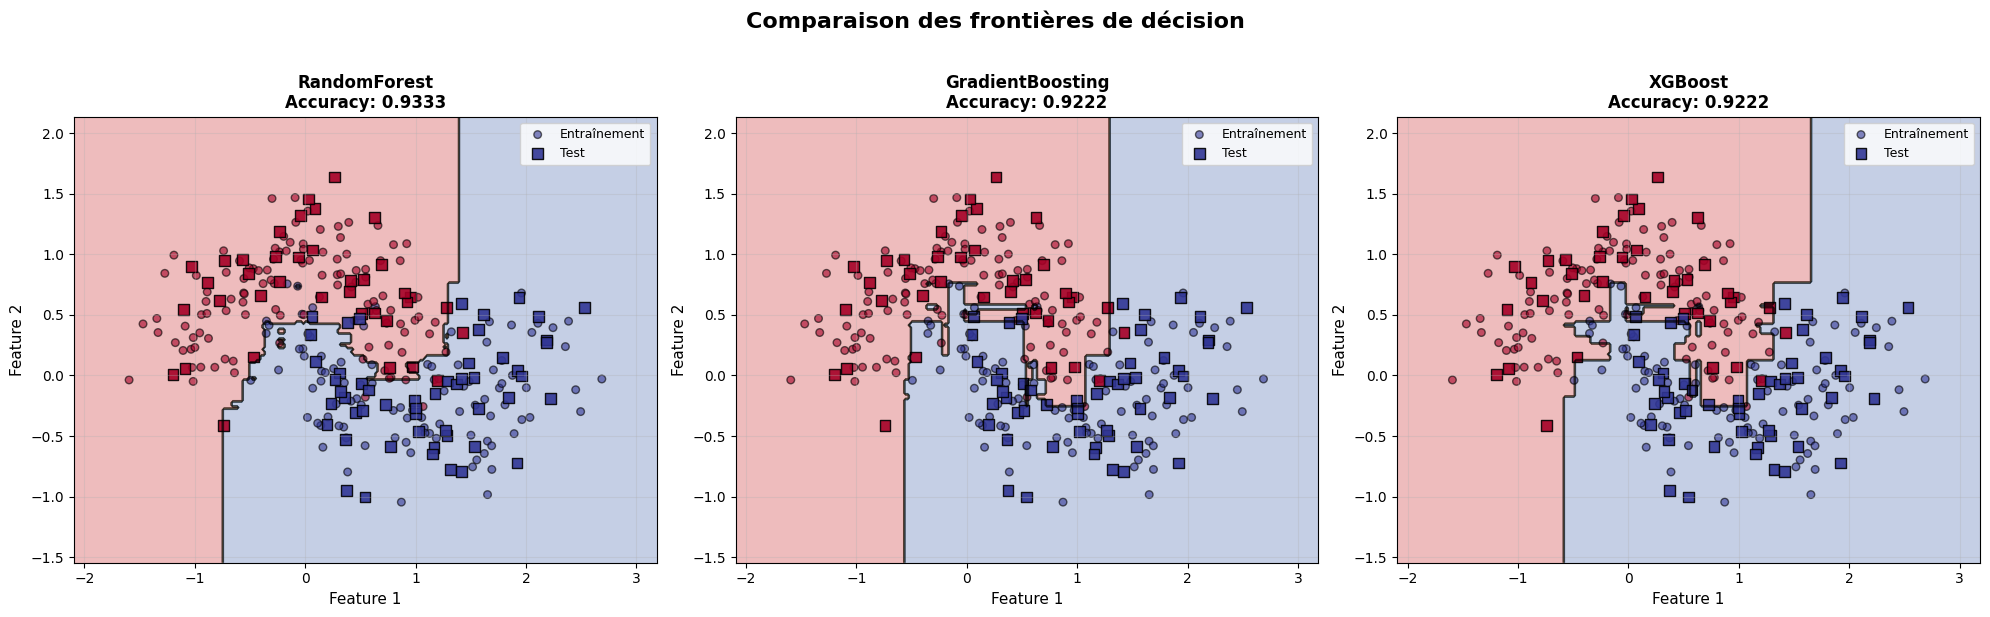

In [339]:
# Visualisation comparative des trois modèles
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, model) in enumerate(trained_models.items()):
    # Prédiction sur la grille
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    
    # Tracer les frontières de décision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
               cmap='RdYlBu', edgecolor='black', s=30, 
               alpha=0.6, label='Entraînement')
    
    # Tracer les points de test
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
               cmap='RdYlBu', edgecolor='black', s=60, 
               alpha=0.9, marker='s', label='Test')
    
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.set_title(f'{name}\nAccuracy: {accuracies[name]:.4f}', 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparaison des frontières de décision', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 7. Traitement des données manquantes

Simulation de données manquantes et comparaison des performances avec imputation.

In [340]:
from sklearn.impute import SimpleImputer

# Créer une copie des données originales
X_train_missing = X_train.copy()
X_test_missing = X_test.copy()

# Introduire des valeurs manquantes de manière aléatoire (20% des valeurs)
np.random.seed(42)
missing_rate = 0.20

# Masque pour les valeurs manquantes dans l'ensemble d'entraînement
mask_train = np.random.rand(*X_train_missing.shape) < missing_rate
X_train_missing[mask_train] = np.nan

# Masque pour les valeurs manquantes dans l'ensemble de test
mask_test = np.random.rand(*X_test_missing.shape) < missing_rate
X_test_missing[mask_test] = np.nan

print(f"Données d'entraînement avec valeurs manquantes:")
print(f"  - Total de valeurs: {X_train_missing.size}")
print(f"  - Valeurs manquantes: {np.isnan(X_train_missing).sum()}")
print(f"  - Pourcentage: {np.isnan(X_train_missing).sum() / X_train_missing.size * 100:.2f}%")

print(f"\nDonnées de test avec valeurs manquantes:")
print(f"  - Total de valeurs: {X_test_missing.size}")
print(f"  - Valeurs manquantes: {np.isnan(X_test_missing).sum()}")
print(f"  - Pourcentage: {np.isnan(X_test_missing).sum() / X_test_missing.size * 100:.2f}%")

Données d'entraînement avec valeurs manquantes:
  - Total de valeurs: 420
  - Valeurs manquantes: 93
  - Pourcentage: 22.14%

Données de test avec valeurs manquantes:
  - Total de valeurs: 180
  - Valeurs manquantes: 42
  - Pourcentage: 23.33%


## 8. Imputation des valeurs manquantes

Utilisation de SimpleImputer avec la stratégie de la moyenne.

In [341]:
# Créer l'imputer avec la stratégie de la moyenne
imputer = SimpleImputer(strategy='mean')

# Ajuster l'imputer sur les données d'entraînement et transformer
X_train_imputed = imputer.fit_transform(X_train_missing)

# Transformer les données de test
X_test_imputed = imputer.transform(X_test_missing)

print("Imputation des valeurs manquantes terminée!")
print(f"Valeurs manquantes restantes dans l'entraînement: {np.isnan(X_train_imputed).sum()}")
print(f"Valeurs manquantes restantes dans le test: {np.isnan(X_test_imputed).sum()}")

Imputation des valeurs manquantes terminée!
Valeurs manquantes restantes dans l'entraînement: 0
Valeurs manquantes restantes dans le test: 0


## 9. Entraînement des modèles sur les données imputées

In [342]:
# Création des modèles pour les données imputées
models_imputed = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')
}

# Entraînement des modèles sur les données imputées
trained_models_imputed = {}
accuracies_imputed = {}

for name, model in models_imputed.items():
    print(f"Entraînement de {name} sur données imputées...")
    model.fit(X_train_imputed, y_train)
    trained_models_imputed[name] = model
    
    # Calcul de l'accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_imputed[name] = accuracy
    print(f"{name} - Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "="*50)
print("Comparaison des performances:")
print("="*50)
for name in models.keys():
    print(f"{name}:")
    print(f"  Sans données manquantes: {accuracies[name]:.4f} ({accuracies[name]*100:.2f}%)")
    print(f"  Avec données imputées:   {accuracies_imputed[name]:.4f} ({accuracies_imputed[name]*100:.2f}%)")
    diff = accuracies_imputed[name] - accuracies[name]
    print(f"  Différence:              {diff:+.4f} ({diff*100:+.2f}%)")
    print()

Entraînement de RandomForest sur données imputées...
RandomForest - Accuracy: 0.8444 (84.44%)
Entraînement de GradientBoosting sur données imputées...
GradientBoosting - Accuracy: 0.8333 (83.33%)
Entraînement de XGBoost sur données imputées...
XGBoost - Accuracy: 0.8667 (86.67%)

Comparaison des performances:
RandomForest:
  Sans données manquantes: 0.9333 (93.33%)
  Avec données imputées:   0.8444 (84.44%)
  Différence:              -0.0889 (-8.89%)

GradientBoosting:
  Sans données manquantes: 0.9222 (92.22%)
  Avec données imputées:   0.8333 (83.33%)
  Différence:              -0.0889 (-8.89%)

XGBoost:
  Sans données manquantes: 0.9222 (92.22%)
  Avec données imputées:   0.8667 (86.67%)
  Différence:              -0.0556 (-5.56%)



## 10. Visualisation des frontières de décision avec données imputées

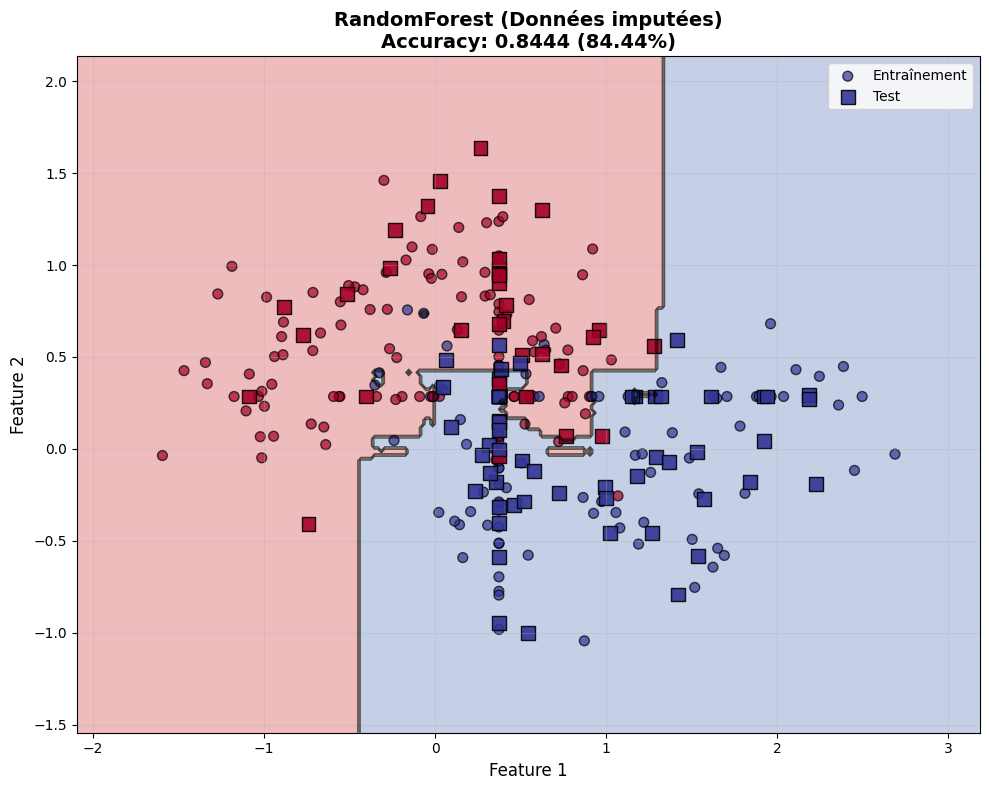

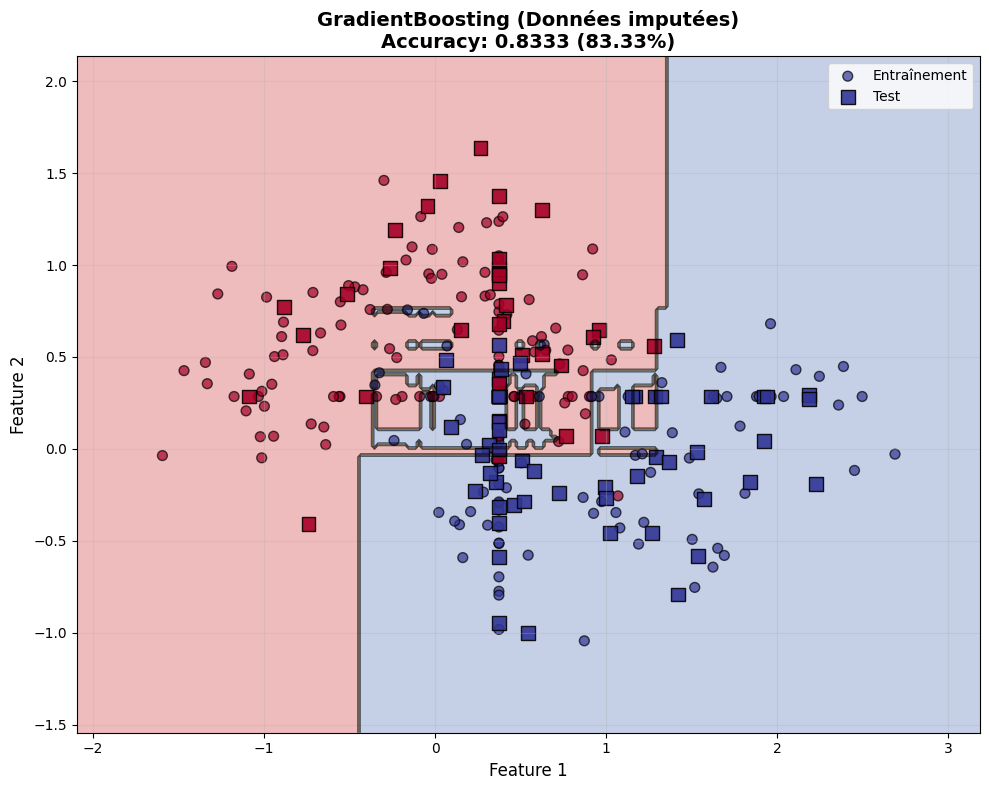

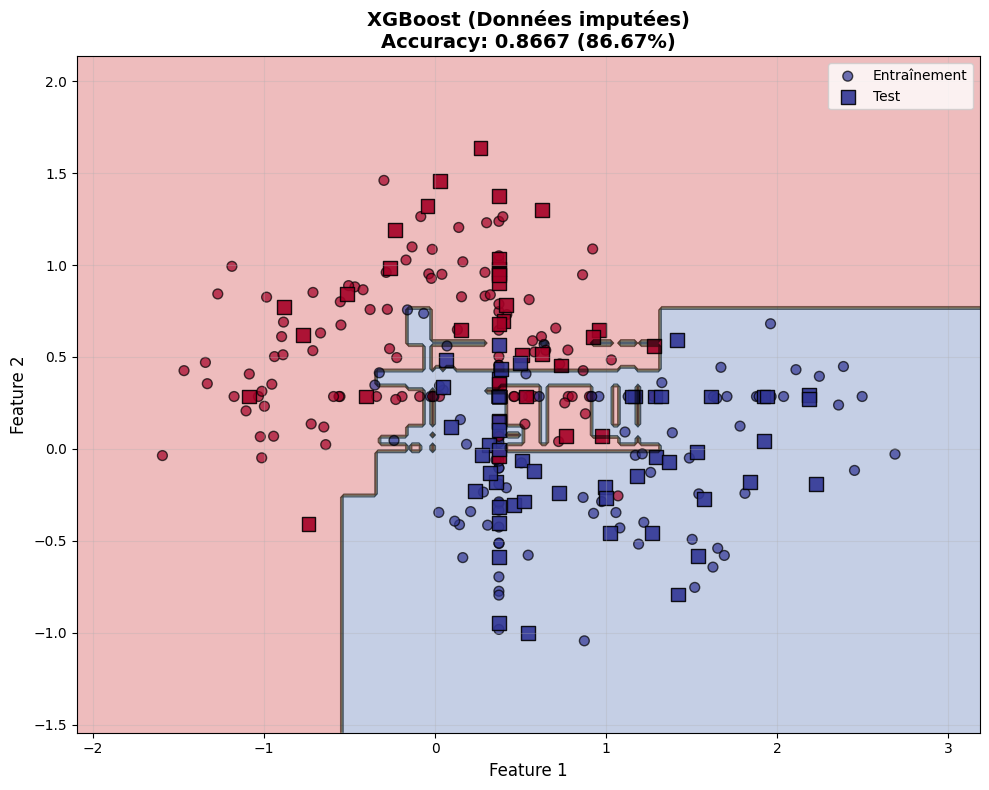

In [343]:
# Visualisation pour chaque modèle avec données imputées
for name, model in trained_models_imputed.items():
    plot_decision_boundary(model, X_train_imputed, y_train, X_test_imputed, y_test, 
                          xx, yy, f"{name} (Données imputées)", accuracies_imputed[name])

## 11. Comparaison côte à côte (données imputées)

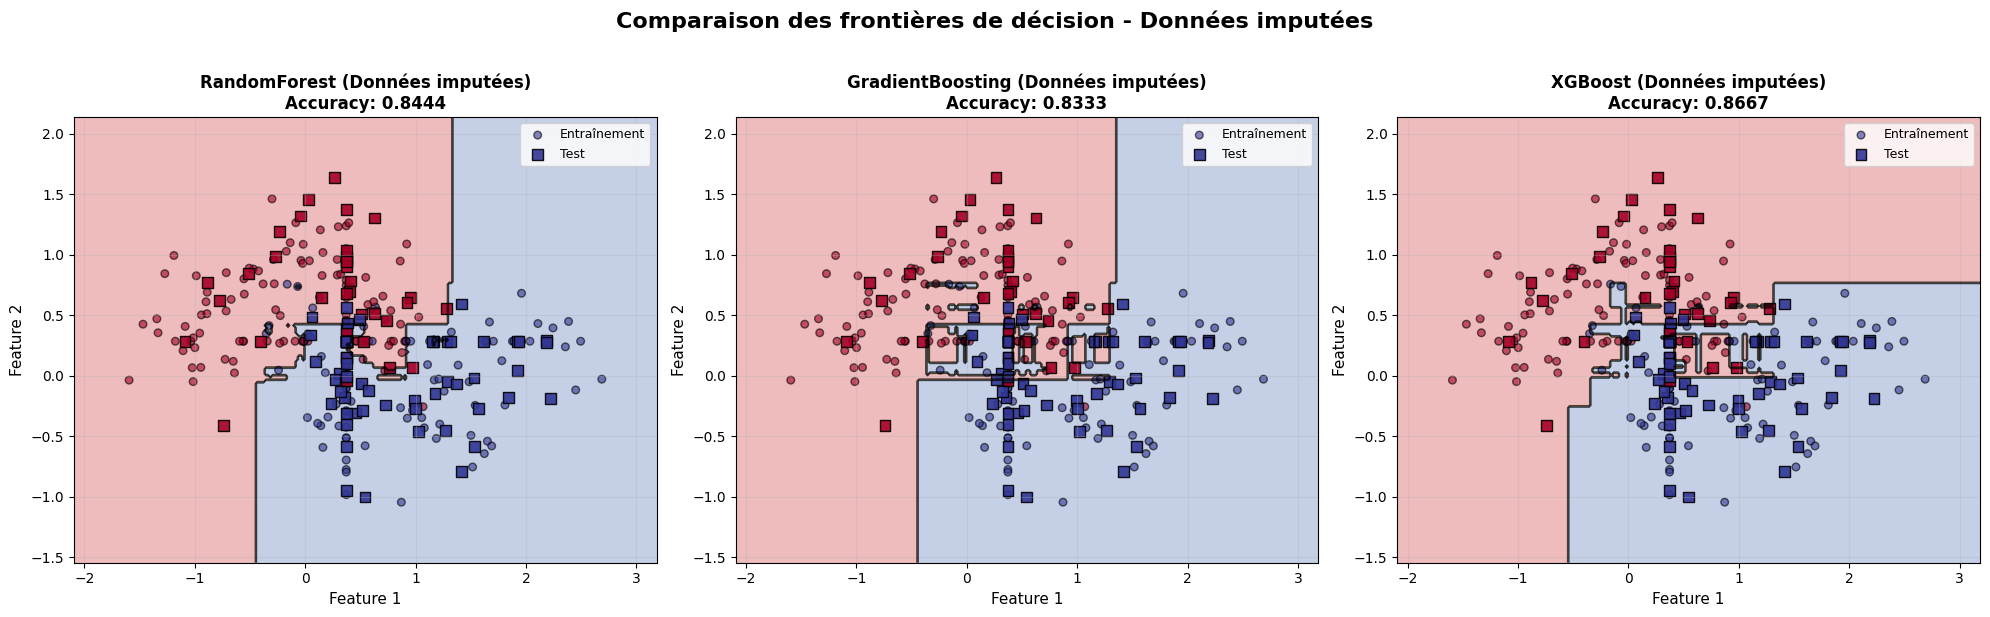

In [344]:
# Visualisation comparative des trois modèles avec données imputées
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, model) in enumerate(trained_models_imputed.items()):
    # Prédiction sur la grille
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    
    # Tracer les frontières de décision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    ax.scatter(X_train_imputed[:, 0], X_train_imputed[:, 1], c=y_train, 
               cmap='RdYlBu', edgecolor='black', s=30, 
               alpha=0.6, label='Entraînement')
    
    # Tracer les points de test
    ax.scatter(X_test_imputed[:, 0], X_test_imputed[:, 1], c=y_test, 
               cmap='RdYlBu', edgecolor='black', s=60, 
               alpha=0.9, marker='s', label='Test')
    
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.set_title(f'{name} (Données imputées)\nAccuracy: {accuracies_imputed[name]:.4f}', 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparaison des frontières de décision - Données imputées', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 12. Comparaison finale : Données originales vs. Données imputées

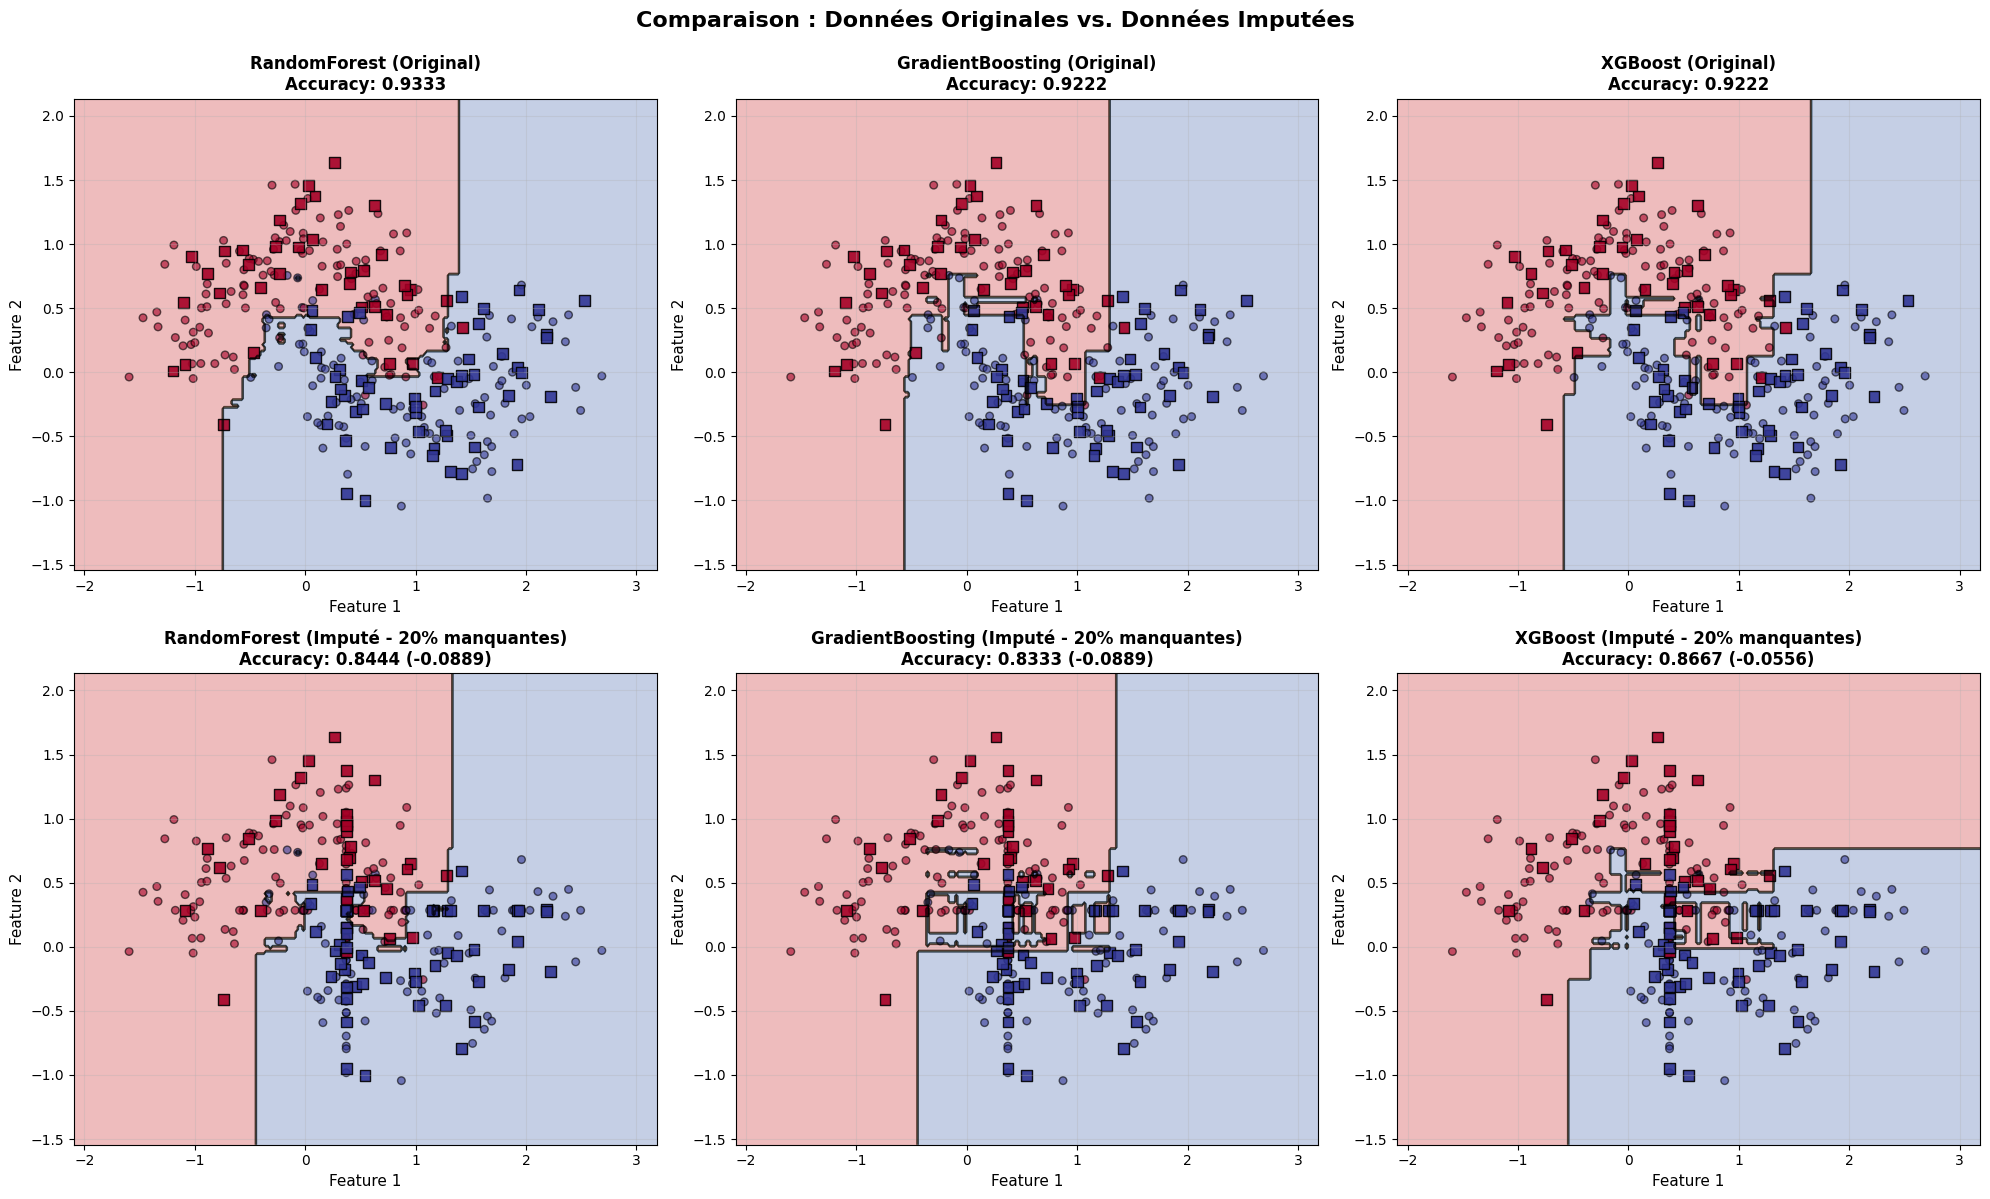

In [345]:
# Visualisation comparative complète : Originales vs Imputées
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

model_names = list(trained_models.keys())

for idx, name in enumerate(model_names):
    # Ligne 1: Données originales
    ax = axes[0, idx]
    model_original = trained_models[name]
    Z = model_original.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
               cmap='RdYlBu', edgecolor='black', s=30, alpha=0.6)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
               cmap='RdYlBu', edgecolor='black', s=60, alpha=0.9, marker='s')
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.set_title(f'{name} (Original)\nAccuracy: {accuracies[name]:.4f}', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Ligne 2: Données imputées
    ax = axes[1, idx]
    model_imputed = trained_models_imputed[name]
    Z = model_imputed.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    ax.scatter(X_train_imputed[:, 0], X_train_imputed[:, 1], c=y_train, 
               cmap='RdYlBu', edgecolor='black', s=30, alpha=0.6)
    ax.scatter(X_test_imputed[:, 0], X_test_imputed[:, 1], c=y_test, 
               cmap='RdYlBu', edgecolor='black', s=60, alpha=0.9, marker='s')
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    
    # Calcul de la différence d'accuracy
    diff = accuracies_imputed[name] - accuracies[name]
    diff_sign = "+" if diff >= 0 else ""
    ax.set_title(f'{name} (Imputé - 20% manquantes)\nAccuracy: {accuracies_imputed[name]:.4f} ({diff_sign}{diff:.4f})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparaison : Données Originales vs. Données Imputées', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 13. Comparaison avec suppression des données manquantes

Au lieu d'imputer les valeurs manquantes, on supprime les lignes contenant des NaN.

In [346]:
# Suppression des lignes avec valeurs manquantes
# On identifie les indices des lignes complètes (sans NaN)
train_complete_mask = ~np.isnan(X_train_missing).any(axis=1)
test_complete_mask = ~np.isnan(X_test_missing).any(axis=1)

X_train_dropped = X_train_missing[train_complete_mask]
y_train_dropped = y_train[train_complete_mask]

X_test_dropped = X_test_missing[test_complete_mask]
y_test_dropped = y_test[test_complete_mask]

print(f"Données d'origine:")
print(f"  - Entraînement: {X_train.shape[0]} échantillons")
print(f"  - Test: {X_test.shape[0]} échantillons")

print(f"\nAprès suppression des données manquantes:")
print(f"  - Entraînement: {X_train_dropped.shape[0]} échantillons (perte de {X_train.shape[0] - X_train_dropped.shape[0]})")
print(f"  - Test: {X_test_dropped.shape[0]} échantillons (perte de {X_test.shape[0] - X_test_dropped.shape[0]})")

# Entraînement des modèles sur les données sans NaN
models_dropped = {
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')
}

trained_models_dropped = {}
accuracies_dropped = {}

print("\n" + "="*50)
print("Entraînement avec données supprimées:")
print("="*50)

for name, model in models_dropped.items():
    print(f"Entraînement de {name}...")
    model.fit(X_train_dropped, y_train_dropped)
    trained_models_dropped[name] = model
    
    # Calcul de l'accuracy
    y_pred = model.predict(X_test_dropped)
    accuracy = accuracy_score(y_test_dropped, y_pred)
    accuracies_dropped[name] = accuracy
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "="*50)
print("Comparaison des stratégies:")
print("="*50)
for name in models.keys():
    print(f"{name}:")
    print(f"  Données originales:     {accuracies[name]:.4f}")
    print(f"  Données imputées:       {accuracies_imputed[name]:.4f}")
    print(f"  Données supprimées:     {accuracies_dropped[name]:.4f}")
    print()

Données d'origine:
  - Entraînement: 210 échantillons
  - Test: 90 échantillons

Après suppression des données manquantes:
  - Entraînement: 127 échantillons (perte de 83)
  - Test: 55 échantillons (perte de 35)

Entraînement avec données supprimées:
Entraînement de RandomForest...
  Accuracy: 0.9273 (92.73%)
Entraînement de GradientBoosting...
  Accuracy: 0.9273 (92.73%)
Entraînement de XGBoost...
  Accuracy: 0.9636 (96.36%)

Comparaison des stratégies:
RandomForest:
  Données originales:     0.9333
  Données imputées:       0.8444
  Données supprimées:     0.9273

GradientBoosting:
  Données originales:     0.9222
  Données imputées:       0.8333
  Données supprimées:     0.9273

XGBoost:
  Données originales:     0.9222
  Données imputées:       0.8667
  Données supprimées:     0.9636



## 14. Exploration des hyperparamètres

Test de différentes configurations d'hyperparamètres pour chaque modèle.

In [347]:
# Test de différentes configurations d'hyperparamètres
hyperparams_configs = {
    'RandomForest': [
        {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2},
        {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2},
        {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5},
        {'n_estimators': 150, 'max_depth': None, 'min_samples_split': 10},
    ],
    'GradientBoosting': [
        {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05},
        {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
        {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2},
        {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05},
    ],
    'XGBoost': [
        {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'reg_alpha': 0, 'reg_lambda': 1},
        {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'reg_alpha': 0, 'reg_lambda': 1},
        {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2, 'reg_alpha': 0, 'reg_lambda': 1},
        {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05, 'reg_alpha': 0.5, 'reg_lambda': 0.5},
    ]
}

results_hyperparams = {}

print("="*70)
print("EXPLORATION DES HYPERPARAMÈTRES")
print("="*70)

for model_name, configs in hyperparams_configs.items():
    print(f"\n{model_name}:")
    print("-" * 70)
    results_hyperparams[model_name] = []
    
    for i, config in enumerate(configs, 1):
        # Créer le modèle selon le type
        if model_name == 'RandomForest':
            model = RandomForestClassifier(**config, random_state=42)
        elif model_name == 'GradientBoosting':
            model = GradientBoostingClassifier(**config, random_state=42)
        else:  # XGBoost
            model = XGBClassifier(**config, random_state=42, eval_metric='logloss')
        
        # Entraîner sur données supprimées (pour éviter l'effet de l'imputation)
        model.fit(X_train_dropped, y_train_dropped)
        y_pred = model.predict(X_test_dropped)
        accuracy = accuracy_score(y_test_dropped, y_pred)
        
        results_hyperparams[model_name].append({
            'config': config,
            'accuracy': accuracy,
            'model': model
        })
        
        print(f"  Config {i}: {config}")
        print(f"    Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Trouver la meilleure configuration
    best_result = max(results_hyperparams[model_name], key=lambda x: x['accuracy'])
    print(f"\n  ✓ Meilleure config: {best_result['config']}")
    print(f"    Accuracy: {best_result['accuracy']:.4f} ({best_result['accuracy']*100:.2f}%)")

print("\n" + "="*70)
print("RÉSUMÉ DES MEILLEURES PERFORMANCES")
print("="*70)
for model_name in hyperparams_configs.keys():
    best = max(results_hyperparams[model_name], key=lambda x: x['accuracy'])
    print(f"{model_name}: {best['accuracy']:.4f} avec {best['config']}")

EXPLORATION DES HYPERPARAMÈTRES

RandomForest:
----------------------------------------------------------------------
  Config 1: {'n_estimators': 50, 'max_depth': 3, 'min_samples_split': 2}
    Accuracy: 0.8727 (87.27%)
  Config 2: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2}
    Accuracy: 0.9273 (92.73%)
  Config 3: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
    Accuracy: 0.9455 (94.55%)
  Config 4: {'n_estimators': 150, 'max_depth': None, 'min_samples_split': 10}
    Accuracy: 0.9273 (92.73%)

  ✓ Meilleure config: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
    Accuracy: 0.9455 (94.55%)

GradientBoosting:
----------------------------------------------------------------------
  Config 1: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05}
    Accuracy: 0.8909 (89.09%)
  Config 2: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
    Accuracy: 0.9273 (92.73%)
  Config 3: {'n_estimators': 200, 'max_depth': 4, 'l

## 15. Régularisation L1 et L2 avec XGBoost

Exploration des paramètres de régularisation L1 (reg_alpha) et L2 (reg_lambda) dans XGBoost.

In [348]:
# Configuration de base pour les tests de régularisation
base_config = {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'random_state': 42, 'eval_metric': 'logloss'}

# Test de différentes combinaisons L1 et L2
regularization_configs = [
    {'name': 'Sans régularisation', 'reg_alpha': 0, 'reg_lambda': 0},
    {'name': 'L2 faible', 'reg_alpha': 0, 'reg_lambda': 0.1},
    {'name': 'L2 moyenne', 'reg_alpha': 0, 'reg_lambda': 1.0},
    {'name': 'L2 forte', 'reg_alpha': 0, 'reg_lambda': 10.0},
    {'name': 'L1 faible', 'reg_alpha': 0.1, 'reg_lambda': 0},
    {'name': 'L1 moyenne', 'reg_alpha': 1.0, 'reg_lambda': 0},
    {'name': 'L1 forte', 'reg_alpha': 10.0, 'reg_lambda': 0},
    {'name': 'Elastic Net (L1=L2 faibles)', 'reg_alpha': 0.1, 'reg_lambda': 0.1},
    {'name': 'Elastic Net (L1=L2 moyens)', 'reg_alpha': 1.0, 'reg_lambda': 1.0},
    {'name': 'Elastic Net (L1=L2 forts)', 'reg_alpha': 5.0, 'reg_lambda': 5.0},
]

regularization_results = []

print("="*70)
print("EXPLORATION DE LA RÉGULARISATION L1 (reg_alpha) ET L2 (reg_lambda)")
print("="*70)

for config in regularization_configs:
    # Créer le modèle avec les paramètres de régularisation
    model_params = base_config.copy()
    model_params['reg_alpha'] = config['reg_alpha']
    model_params['reg_lambda'] = config['reg_lambda']
    
    model = XGBClassifier(**model_params)
    
    # Entraîner sur données supprimées
    model.fit(X_train_dropped, y_train_dropped)
    y_pred = model.predict(X_test_dropped)
    accuracy = accuracy_score(y_test_dropped, y_pred)
    
    regularization_results.append({
        'name': config['name'],
        'reg_alpha': config['reg_alpha'],
        'reg_lambda': config['reg_lambda'],
        'accuracy': accuracy,
        'model': model
    })
    
    print(f"\n{config['name']}:")
    print(f"  reg_alpha (L1): {config['reg_alpha']}")
    print(f"  reg_lambda (L2): {config['reg_lambda']}")
    print(f"  Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Trouver la meilleure configuration
best_reg = max(regularization_results, key=lambda x: x['accuracy'])
print("\n" + "="*70)
print("MEILLEURE CONFIGURATION:")
print("="*70)
print(f"Nom: {best_reg['name']}")
print(f"reg_alpha (L1): {best_reg['reg_alpha']}")
print(f"reg_lambda (L2): {best_reg['reg_lambda']}")
print(f"Accuracy: {best_reg['accuracy']:.4f} ({best_reg['accuracy']*100:.2f}%)")

EXPLORATION DE LA RÉGULARISATION L1 (reg_alpha) ET L2 (reg_lambda)

Sans régularisation:
  reg_alpha (L1): 0
  reg_lambda (L2): 0
  Accuracy: 0.9636 (96.36%)

L2 faible:
  reg_alpha (L1): 0
  reg_lambda (L2): 0.1
  Accuracy: 0.9636 (96.36%)

L2 moyenne:
  reg_alpha (L1): 0
  reg_lambda (L2): 1.0
  Accuracy: 0.9636 (96.36%)

L2 forte:
  reg_alpha (L1): 0
  reg_lambda (L2): 10.0
  Accuracy: 0.9455 (94.55%)

L1 faible:
  reg_alpha (L1): 0.1
  reg_lambda (L2): 0
  Accuracy: 0.9636 (96.36%)

L1 moyenne:
  reg_alpha (L1): 1.0
  reg_lambda (L2): 0
  Accuracy: 0.9636 (96.36%)

L1 forte:
  reg_alpha (L1): 10.0
  reg_lambda (L2): 0
  Accuracy: 0.8909 (89.09%)

Elastic Net (L1=L2 faibles):
  reg_alpha (L1): 0.1
  reg_lambda (L2): 0.1
  Accuracy: 0.9636 (96.36%)

Elastic Net (L1=L2 moyens):
  reg_alpha (L1): 1.0
  reg_lambda (L2): 1.0
  Accuracy: 0.9636 (96.36%)

Elastic Net (L1=L2 forts):
  reg_alpha (L1): 5.0
  reg_lambda (L2): 5.0
  Accuracy: 0.8909 (89.09%)

MEILLEURE CONFIGURATION:
Nom: Sans 

## 16. Visualisation des effets de la régularisation

Comparaison des frontières de décision avec différentes configurations de régularisation.

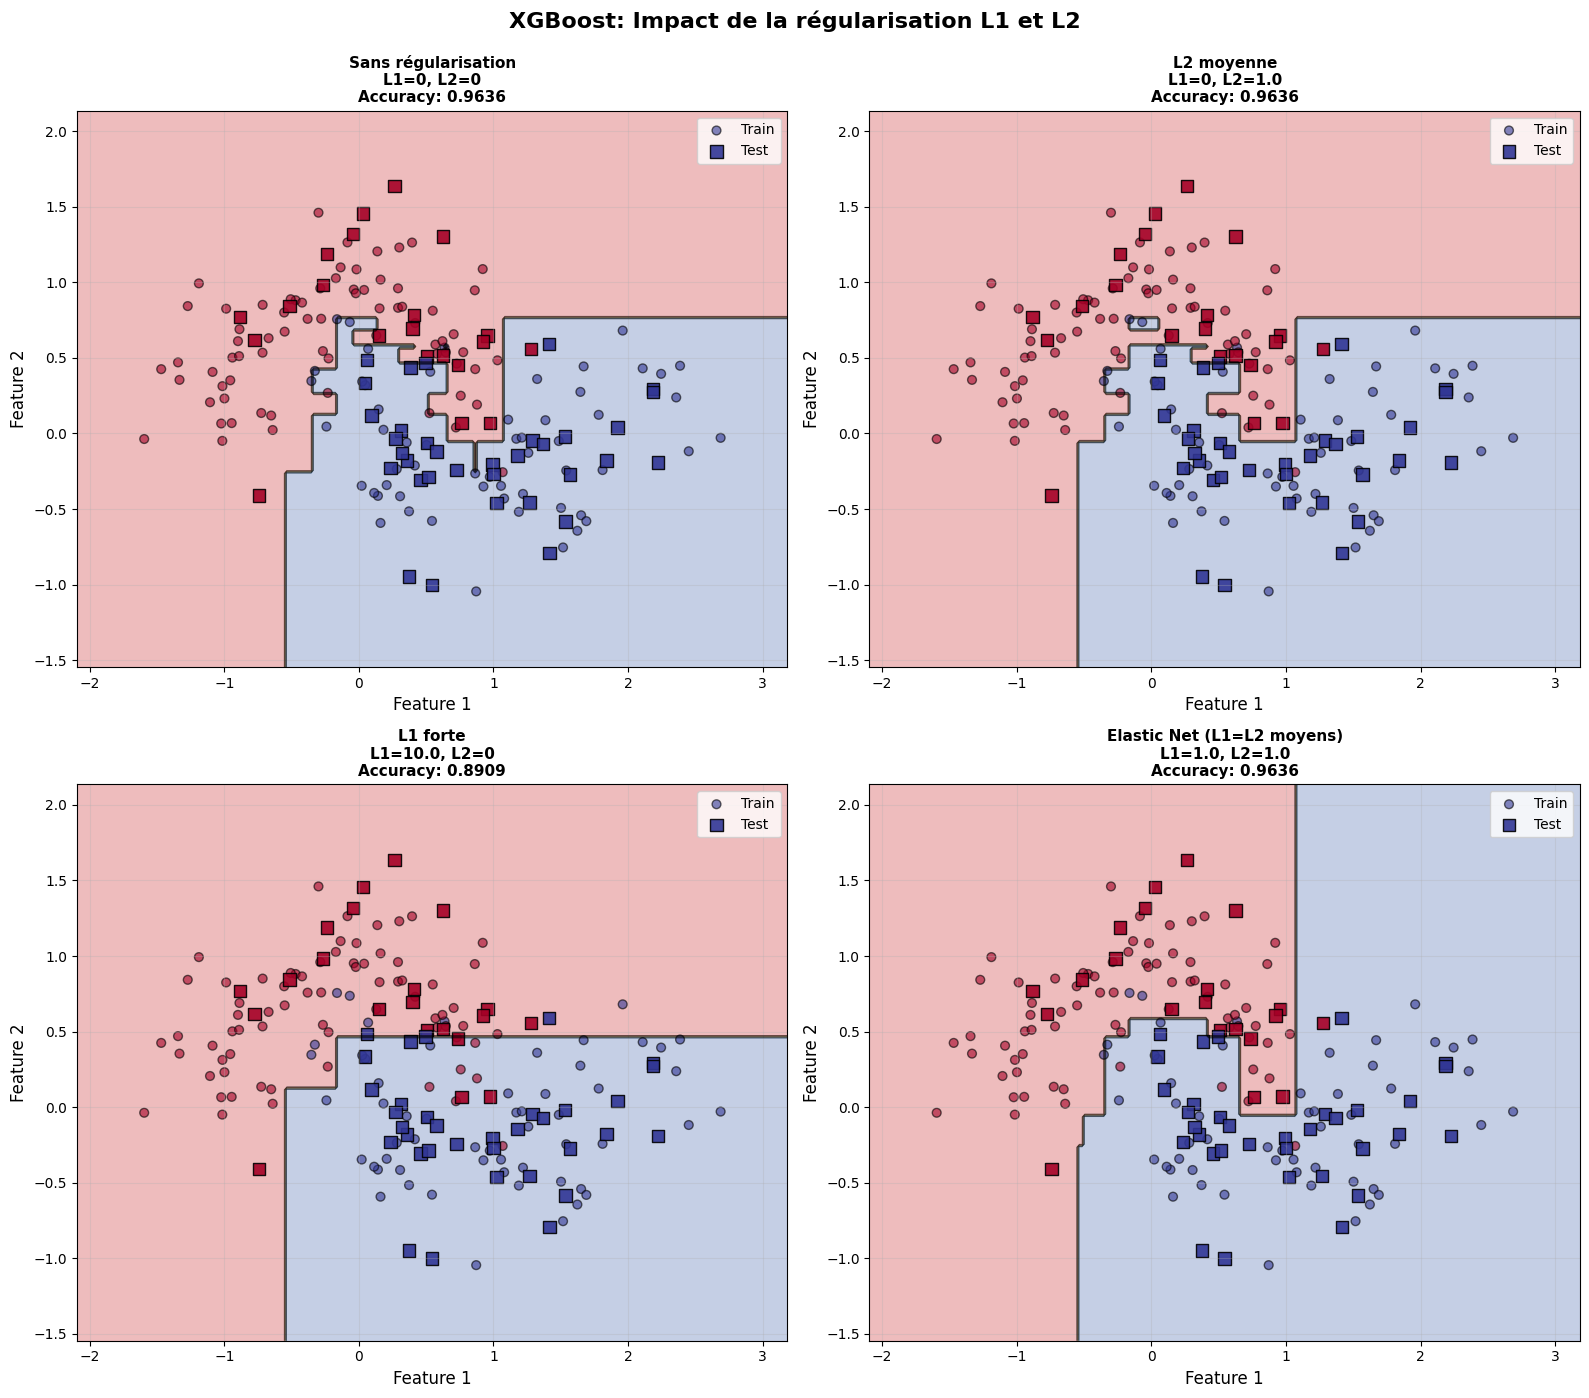

In [349]:
# Sélectionner quelques configurations intéressantes pour visualisation
configs_to_plot = [
    regularization_results[0],  # Sans régularisation
    regularization_results[2],  # L2 moyenne
    regularization_results[6],  # L1 forte
    regularization_results[8],  # Elastic Net moyens
]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, result in enumerate(configs_to_plot):
    model = result['model']
    
    # Prédiction sur la grille
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    
    # Tracer les frontières de décision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    ax.scatter(X_train_dropped[:, 0], X_train_dropped[:, 1], c=y_train_dropped, 
               cmap='RdYlBu', edgecolor='black', s=40, alpha=0.6, label='Train')
    
    # Tracer les points de test
    ax.scatter(X_test_dropped[:, 0], X_test_dropped[:, 1], c=y_test_dropped, 
               cmap='RdYlBu', edgecolor='black', s=80, alpha=0.9, marker='s', label='Test')
    
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(f"{result['name']}\nL1={result['reg_alpha']}, L2={result['reg_lambda']}\nAccuracy: {result['accuracy']:.4f}", 
                 fontsize=11, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.suptitle('XGBoost: Impact de la régularisation L1 et L2', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 17. Graphique de comparaison des performances de régularisation

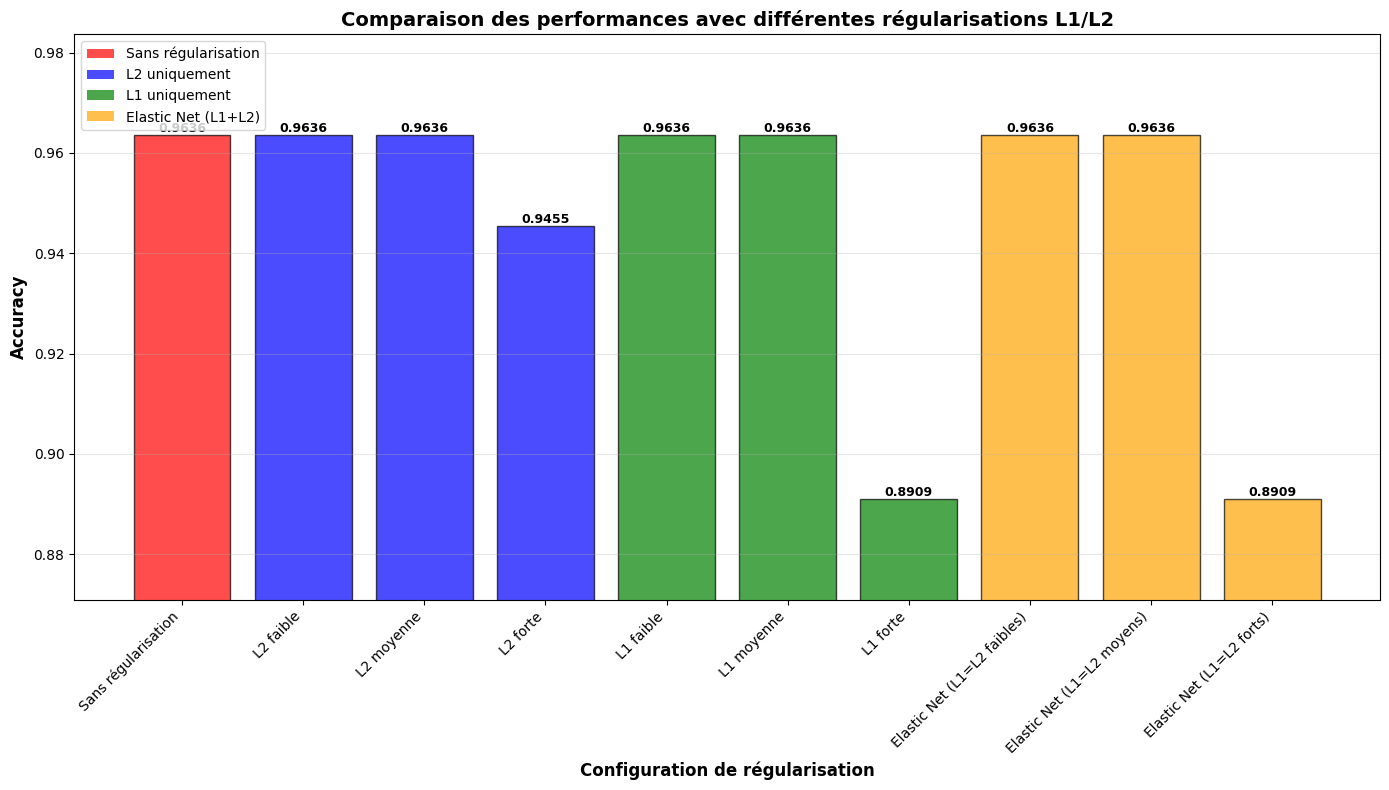

In [350]:
# Créer un graphique en barres pour comparer les performances
fig, ax = plt.subplots(figsize=(14, 8))

names = [r['name'] for r in regularization_results]
accuracies_reg = [r['accuracy'] for r in regularization_results]
colors = ['red' if r['reg_alpha'] == 0 and r['reg_lambda'] == 0 else 
          'blue' if r['reg_alpha'] == 0 else 
          'green' if r['reg_lambda'] == 0 else 
          'orange' for r in regularization_results]

bars = ax.bar(range(len(names)), accuracies_reg, color=colors, alpha=0.7, edgecolor='black')

# Ajouter les valeurs sur les barres
for i, (bar, acc) in enumerate(zip(bars, accuracies_reg)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Configuration de régularisation', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Comparaison des performances avec différentes régularisations L1/L2', 
             fontsize=14, fontweight='bold')
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim([min(accuracies_reg) - 0.02, max(accuracies_reg) + 0.02])

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='Sans régularisation'),
    Patch(facecolor='blue', alpha=0.7, label='L2 uniquement'),
    Patch(facecolor='green', alpha=0.7, label='L1 uniquement'),
    Patch(facecolor='orange', alpha=0.7, label='Elastic Net (L1+L2)')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

## 18. Comparaison finale complète

Tableau récapitulatif de toutes les approches testées.

In [351]:
import pandas as pd

# Créer un tableau récapitulatif
summary_data = []

# Données originales
for name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
    summary_data.append({
        'Modèle': name,
        'Approche': 'Données originales',
        'Détails': 'Sans données manquantes',
        'Accuracy': accuracies[name]
    })

# Données imputées
for name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
    summary_data.append({
        'Modèle': name,
        'Approche': 'Imputation (moyenne)',
        'Détails': '20% données manquantes imputées',
        'Accuracy': accuracies_imputed[name]
    })

# Données supprimées
for name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
    summary_data.append({
        'Modèle': name,
        'Approche': 'Suppression des NaN',
        'Détails': 'Lignes avec NaN supprimées',
        'Accuracy': accuracies_dropped[name]
    })

# Meilleures configs hyperparamètres
for model_name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
    best = max(results_hyperparams[model_name], key=lambda x: x['accuracy'])
    config_str = ', '.join([f"{k}={v}" for k, v in best['config'].items()])
    summary_data.append({
        'Modèle': model_name,
        'Approche': 'Hyperparamètres optimisés',
        'Détails': config_str[:50] + '...' if len(config_str) > 50 else config_str,
        'Accuracy': best['accuracy']
    })

# Meilleures configs régularisation (XGBoost)
best_reg = max(regularization_results, key=lambda x: x['accuracy'])
summary_data.append({
    'Modèle': 'XGBoost',
    'Approche': 'Régularisation optimale',
    'Détails': f"{best_reg['name']} (L1={best_reg['reg_alpha']}, L2={best_reg['reg_lambda']})",
    'Accuracy': best_reg['accuracy']
})

# Créer DataFrame et afficher
df_summary = pd.DataFrame(summary_data)
df_summary = df_summary.sort_values(['Modèle', 'Accuracy'], ascending=[True, False])

print("="*100)
print("TABLEAU RÉCAPITULATIF DE TOUTES LES APPROCHES")
print("="*100)
print(df_summary.to_string(index=False))
print("\n" + "="*100)
print("MEILLEURES PERFORMANCES PAR MODÈLE")
print("="*100)

for model_name in ['RandomForest', 'GradientBoosting', 'XGBoost']:
    model_data = df_summary[df_summary['Modèle'] == model_name]
    best_row = model_data.loc[model_data['Accuracy'].idxmax()]
    print(f"\n{model_name}:")
    print(f"  Approche: {best_row['Approche']}")
    print(f"  Détails: {best_row['Détails']}")
    print(f"  Accuracy: {best_row['Accuracy']:.4f} ({best_row['Accuracy']*100:.2f}%)")

# Meilleure performance globale
best_overall = df_summary.loc[df_summary['Accuracy'].idxmax()]
print("\n" + "="*100)
print("MEILLEURE PERFORMANCE GLOBALE")
print("="*100)
print(f"Modèle: {best_overall['Modèle']}")
print(f"Approche: {best_overall['Approche']}")
print(f"Détails: {best_overall['Détails']}")
print(f"Accuracy: {best_overall['Accuracy']:.4f} ({best_overall['Accuracy']*100:.2f}%)")

TABLEAU RÉCAPITULATIF DE TOUTES LES APPROCHES
          Modèle                  Approche                                               Détails  Accuracy
GradientBoosting Hyperparamètres optimisés      n_estimators=200, max_depth=4, learning_rate=0.2  0.945455
GradientBoosting       Suppression des NaN                            Lignes avec NaN supprimées  0.927273
GradientBoosting        Données originales                               Sans données manquantes  0.922222
GradientBoosting      Imputation (moyenne)                       20% données manquantes imputées  0.833333
    RandomForest Hyperparamètres optimisés n_estimators=200, max_depth=10, min_samples_split=...  0.945455
    RandomForest        Données originales                               Sans données manquantes  0.933333
    RandomForest       Suppression des NaN                            Lignes avec NaN supprimées  0.927273
    RandomForest      Imputation (moyenne)                       20% données manquantes imputées  

## 19. Heatmap des performances de régularisation L1/L2

Création de la heatmap L1/L2... (cela peut prendre un moment)
  Progression: 1/8 lignes complétées
  Progression: 2/8 lignes complétées
  Progression: 3/8 lignes complétées
  Progression: 4/8 lignes complétées
  Progression: 5/8 lignes complétées
  Progression: 6/8 lignes complétées
  Progression: 7/8 lignes complétées
  Progression: 8/8 lignes complétées
Heatmap générée!


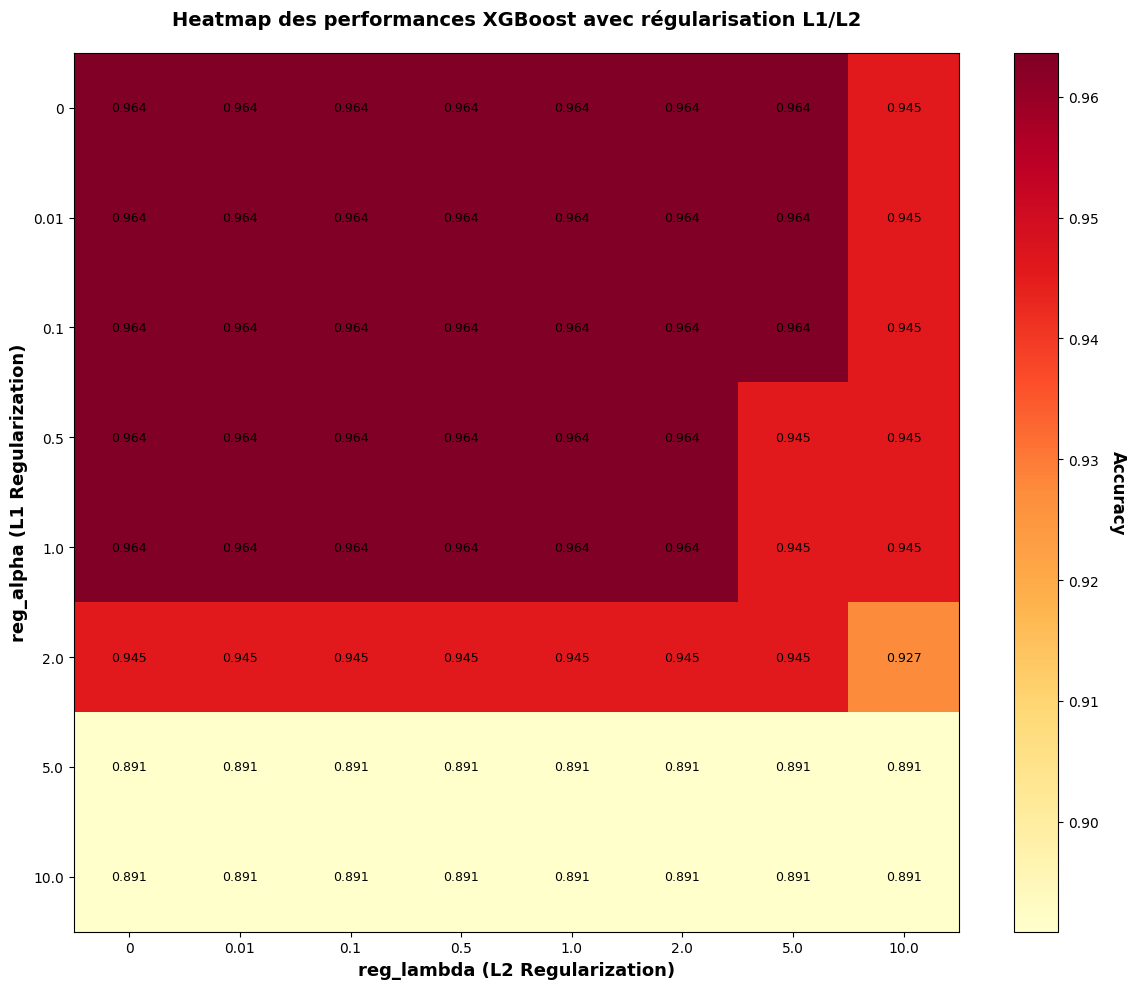


Meilleurs paramètres trouvés:
  reg_alpha (L1): 0
  reg_lambda (L2): 0
  Accuracy: 0.9636


In [352]:
# Créer une grille plus dense pour explorer L1 et L2
alpha_values = [0, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
lambda_values = [0, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

# Matrice pour stocker les résultats
heatmap_data = np.zeros((len(alpha_values), len(lambda_values)))

print("Création de la heatmap L1/L2... (cela peut prendre un moment)")

for i, alpha in enumerate(alpha_values):
    for j, lambda_val in enumerate(lambda_values):
        model = XGBClassifier(
            n_estimators=100, 
            max_depth=3, 
            learning_rate=0.1,
            reg_alpha=alpha, 
            reg_lambda=lambda_val,
            random_state=42,
            eval_metric='logloss'
        )
        
        model.fit(X_train_dropped, y_train_dropped)
        y_pred = model.predict(X_test_dropped)
        accuracy = accuracy_score(y_test_dropped, y_pred)
        heatmap_data[i, j] = accuracy
    
    print(f"  Progression: {i+1}/{len(alpha_values)} lignes complétées")

print("Heatmap générée!")

# Créer la visualisation
fig, ax = plt.subplots(figsize=(12, 10))

im = ax.imshow(heatmap_data, cmap='YlOrRd', aspect='auto', interpolation='nearest')

# Configurer les axes
ax.set_xticks(np.arange(len(lambda_values)))
ax.set_yticks(np.arange(len(alpha_values)))
ax.set_xticklabels([f'{v}' for v in lambda_values])
ax.set_yticklabels([f'{v}' for v in alpha_values])

ax.set_xlabel('reg_lambda (L2 Regularization)', fontsize=13, fontweight='bold')
ax.set_ylabel('reg_alpha (L1 Regularization)', fontsize=13, fontweight='bold')
ax.set_title('Heatmap des performances XGBoost avec régularisation L1/L2', 
             fontsize=14, fontweight='bold', pad=20)

# Ajouter les valeurs dans chaque cellule
for i in range(len(alpha_values)):
    for j in range(len(lambda_values)):
        text = ax.text(j, i, f'{heatmap_data[i, j]:.3f}',
                      ha="center", va="center", color="black", fontsize=9)

# Ajouter la barre de couleur
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Accuracy', rotation=270, labelpad=20, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Trouver les meilleurs paramètres
best_i, best_j = np.unravel_index(heatmap_data.argmax(), heatmap_data.shape)
print(f"\nMeilleurs paramètres trouvés:")
print(f"  reg_alpha (L1): {alpha_values[best_i]}")
print(f"  reg_lambda (L2): {lambda_values[best_j]}")
print(f"  Accuracy: {heatmap_data[best_i, best_j]:.4f}")

## 20. Exploration approfondie des hyperparamètres - RandomForest

Analyse de l'impact de max_depth et n_estimators sur RandomForest.

Création de la heatmap RandomForest... (cela peut prendre un moment)
  Progression: 1/7 lignes complétées
  Progression: 2/7 lignes complétées
  Progression: 3/7 lignes complétées
  Progression: 4/7 lignes complétées
  Progression: 5/7 lignes complétées
  Progression: 6/7 lignes complétées
  Progression: 7/7 lignes complétées
Heatmap RandomForest générée!


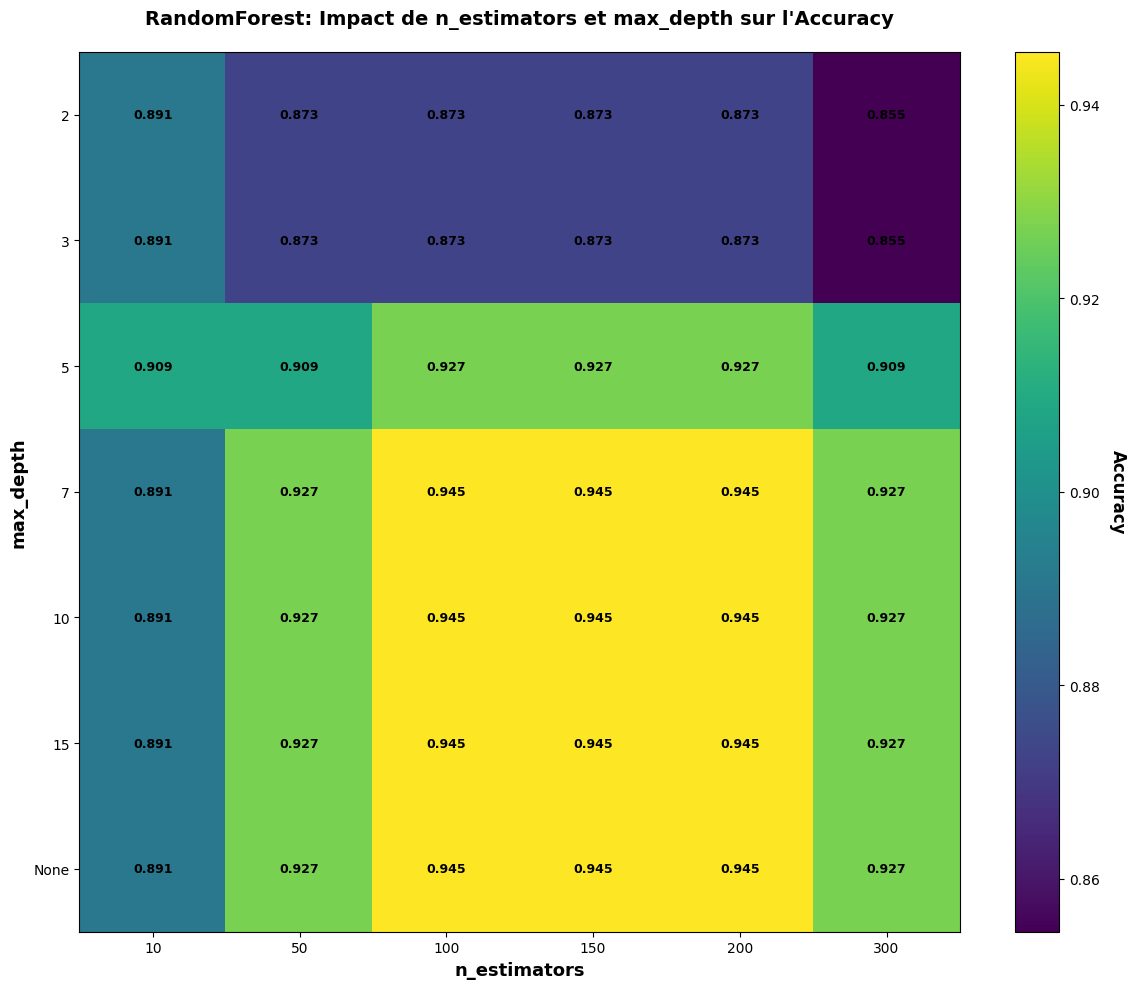


Meilleurs paramètres RandomForest:
  n_estimators: 100
  max_depth: 7
  Accuracy: 0.9455


In [353]:
# Grille de paramètres pour RandomForest
rf_n_estimators = [10, 50, 100, 150, 200, 300]
rf_max_depth = [2, 3, 5, 7, 10, 15, None]

# Matrice pour stocker les résultats
rf_heatmap_data = np.zeros((len(rf_max_depth), len(rf_n_estimators)))

print("Création de la heatmap RandomForest... (cela peut prendre un moment)")

for i, depth in enumerate(rf_max_depth):
    for j, n_est in enumerate(rf_n_estimators):
        model = RandomForestClassifier(
            n_estimators=n_est, 
            max_depth=depth,
            min_samples_split=2,
            random_state=42
        )
        
        model.fit(X_train_dropped, y_train_dropped)
        y_pred = model.predict(X_test_dropped)
        accuracy = accuracy_score(y_test_dropped, y_pred)
        rf_heatmap_data[i, j] = accuracy
    
    print(f"  Progression: {i+1}/{len(rf_max_depth)} lignes complétées")

print("Heatmap RandomForest générée!")

# Créer la visualisation
fig, ax = plt.subplots(figsize=(12, 10))

im = ax.imshow(rf_heatmap_data, cmap='viridis', aspect='auto', interpolation='nearest')

# Configurer les axes
ax.set_xticks(np.arange(len(rf_n_estimators)))
ax.set_yticks(np.arange(len(rf_max_depth)))
ax.set_xticklabels([f'{v}' for v in rf_n_estimators])
ax.set_yticklabels([f'{v}' if v is not None else 'None' for v in rf_max_depth])

ax.set_xlabel('n_estimators', fontsize=13, fontweight='bold')
ax.set_ylabel('max_depth', fontsize=13, fontweight='bold')
ax.set_title('RandomForest: Impact de n_estimators et max_depth sur l\'Accuracy', 
             fontsize=14, fontweight='bold', pad=20)

# Ajouter les valeurs dans chaque cellule
for i in range(len(rf_max_depth)):
    for j in range(len(rf_n_estimators)):
        text = ax.text(j, i, f'{rf_heatmap_data[i, j]:.3f}',
                      ha="center", va="center", color="white" if rf_heatmap_data[i, j] < 0.85 else "black", 
                      fontsize=9, fontweight='bold')

# Ajouter la barre de couleur
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Accuracy', rotation=270, labelpad=20, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Trouver les meilleurs paramètres
best_i, best_j = np.unravel_index(rf_heatmap_data.argmax(), rf_heatmap_data.shape)
print(f"\nMeilleurs paramètres RandomForest:")
print(f"  n_estimators: {rf_n_estimators[best_j]}")
print(f"  max_depth: {rf_max_depth[best_i]}")
print(f"  Accuracy: {rf_heatmap_data[best_i, best_j]:.4f}")

## 21. Comparaison visuelle des meilleures configurations - RandomForest

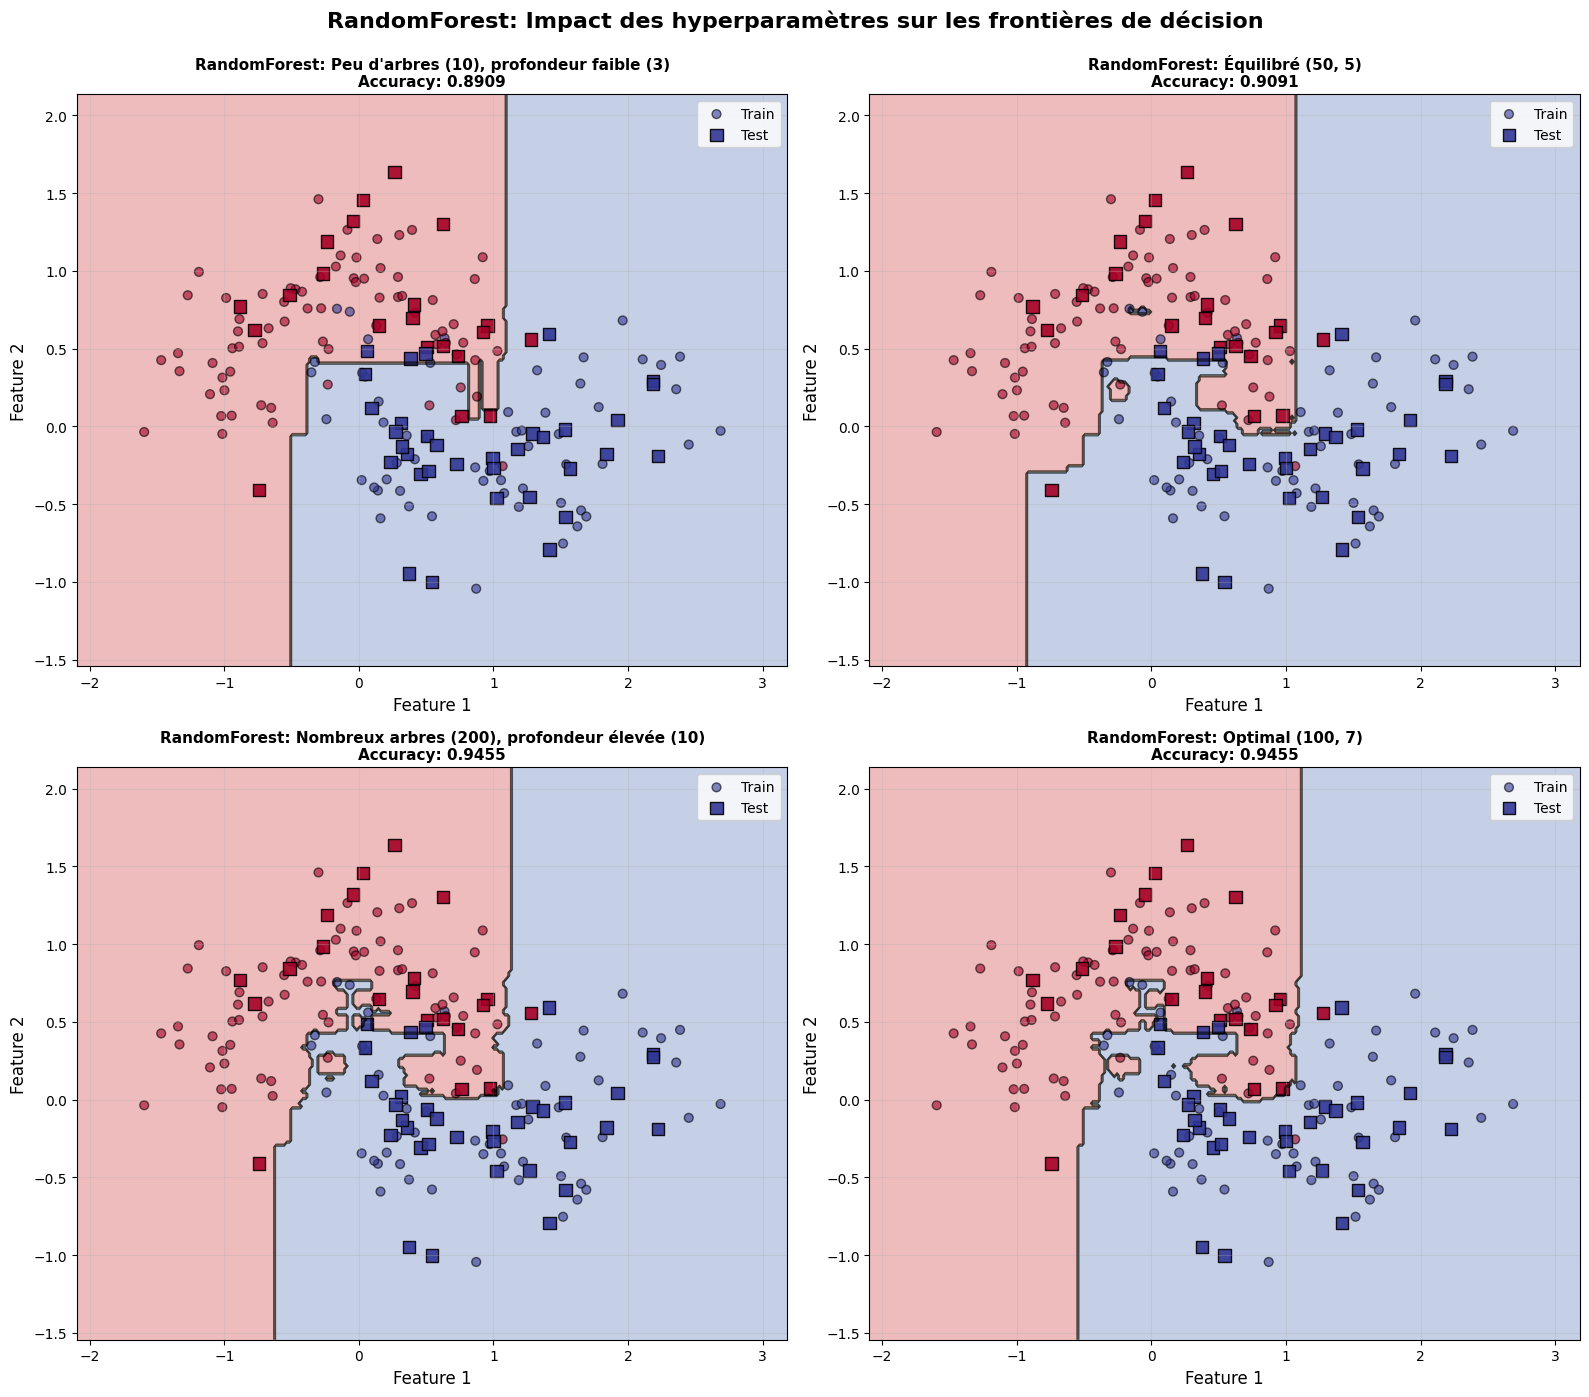

In [354]:
# Sélectionner 4 configurations intéressantes pour RandomForest
rf_configs_to_plot = [
    {'n_estimators': 10, 'max_depth': 3, 'label': 'Peu d\'arbres (10), profondeur faible (3)'},
    {'n_estimators': 50, 'max_depth': 5, 'label': 'Équilibré (50, 5)'},
    {'n_estimators': 200, 'max_depth': 10, 'label': 'Nombreux arbres (200), profondeur élevée (10)'},
    {'n_estimators': rf_n_estimators[best_j], 'max_depth': rf_max_depth[best_i], 'label': f'Optimal ({rf_n_estimators[best_j]}, {rf_max_depth[best_i]})'},
]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, config in enumerate(rf_configs_to_plot):
    model = RandomForestClassifier(
        n_estimators=config['n_estimators'],
        max_depth=config['max_depth'],
        min_samples_split=2,
        random_state=42
    )
    
    model.fit(X_train_dropped, y_train_dropped)
    y_pred = model.predict(X_test_dropped)
    accuracy = accuracy_score(y_test_dropped, y_pred)
    
    # Prédiction sur la grille
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    
    # Tracer les frontières de décision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    ax.scatter(X_train_dropped[:, 0], X_train_dropped[:, 1], c=y_train_dropped, 
               cmap='RdYlBu', edgecolor='black', s=40, alpha=0.6, label='Train')
    
    # Tracer les points de test
    ax.scatter(X_test_dropped[:, 0], X_test_dropped[:, 1], c=y_test_dropped, 
               cmap='RdYlBu', edgecolor='black', s=80, alpha=0.9, marker='s', label='Test')
    
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(f"RandomForest: {config['label']}\nAccuracy: {accuracy:.4f}", 
                 fontsize=11, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.suptitle('RandomForest: Impact des hyperparamètres sur les frontières de décision', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 22. Exploration approfondie des hyperparamètres - GradientBoosting

Analyse de l'impact de learning_rate et n_estimators sur GradientBoosting.

Création de la heatmap GradientBoosting... (cela peut prendre un moment)
  Progression: 1/7 lignes complétées
  Progression: 2/7 lignes complétées
  Progression: 3/7 lignes complétées
  Progression: 4/7 lignes complétées
  Progression: 5/7 lignes complétées
  Progression: 6/7 lignes complétées
  Progression: 7/7 lignes complétées
Heatmap GradientBoosting générée!


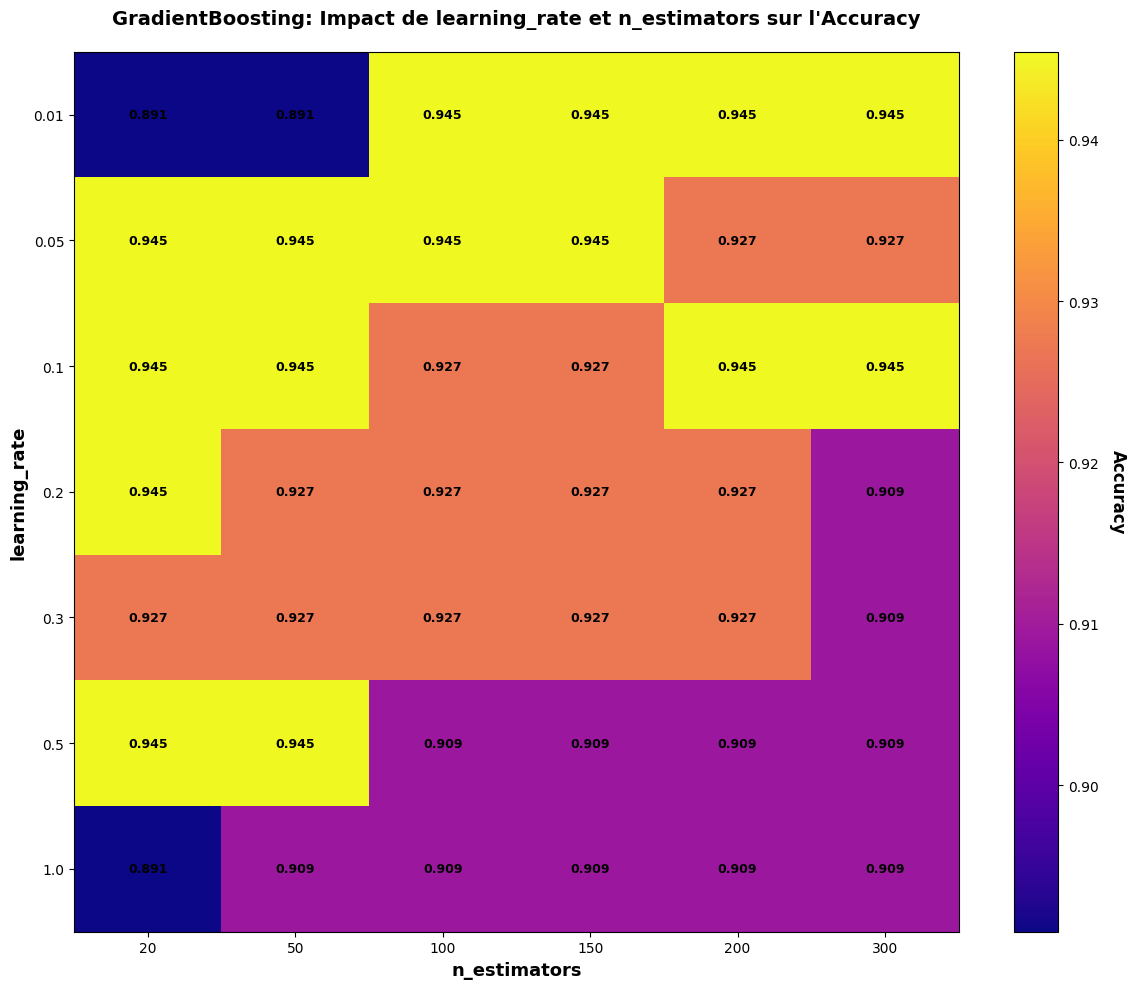


Meilleurs paramètres GradientBoosting:
  learning_rate: 0.01
  n_estimators: 100
  Accuracy: 0.9455


In [355]:
# Grille de paramètres pour GradientBoosting
gb_learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1.0]
gb_n_estimators = [20, 50, 100, 150, 200, 300]

# Matrice pour stocker les résultats
gb_heatmap_data = np.zeros((len(gb_learning_rates), len(gb_n_estimators)))

print("Création de la heatmap GradientBoosting... (cela peut prendre un moment)")

for i, lr in enumerate(gb_learning_rates):
    for j, n_est in enumerate(gb_n_estimators):
        model = GradientBoostingClassifier(
            n_estimators=n_est, 
            learning_rate=lr,
            max_depth=3,
            random_state=42
        )
        
        model.fit(X_train_dropped, y_train_dropped)
        y_pred = model.predict(X_test_dropped)
        accuracy = accuracy_score(y_test_dropped, y_pred)
        gb_heatmap_data[i, j] = accuracy
    
    print(f"  Progression: {i+1}/{len(gb_learning_rates)} lignes complétées")

print("Heatmap GradientBoosting générée!")

# Créer la visualisation
fig, ax = plt.subplots(figsize=(12, 10))

im = ax.imshow(gb_heatmap_data, cmap='plasma', aspect='auto', interpolation='nearest')

# Configurer les axes
ax.set_xticks(np.arange(len(gb_n_estimators)))
ax.set_yticks(np.arange(len(gb_learning_rates)))
ax.set_xticklabels([f'{v}' for v in gb_n_estimators])
ax.set_yticklabels([f'{v}' for v in gb_learning_rates])

ax.set_xlabel('n_estimators', fontsize=13, fontweight='bold')
ax.set_ylabel('learning_rate', fontsize=13, fontweight='bold')
ax.set_title('GradientBoosting: Impact de learning_rate et n_estimators sur l\'Accuracy', 
             fontsize=14, fontweight='bold', pad=20)

# Ajouter les valeurs dans chaque cellule
for i in range(len(gb_learning_rates)):
    for j in range(len(gb_n_estimators)):
        text = ax.text(j, i, f'{gb_heatmap_data[i, j]:.3f}',
                      ha="center", va="center", color="white" if gb_heatmap_data[i, j] < 0.85 else "black", 
                      fontsize=9, fontweight='bold')

# Ajouter la barre de couleur
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Accuracy', rotation=270, labelpad=20, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Trouver les meilleurs paramètres
best_i_gb, best_j_gb = np.unravel_index(gb_heatmap_data.argmax(), gb_heatmap_data.shape)
print(f"\nMeilleurs paramètres GradientBoosting:")
print(f"  learning_rate: {gb_learning_rates[best_i_gb]}")
print(f"  n_estimators: {gb_n_estimators[best_j_gb]}")
print(f"  Accuracy: {gb_heatmap_data[best_i_gb, best_j_gb]:.4f}")

## 23. Comparaison visuelle des meilleures configurations - GradientBoosting

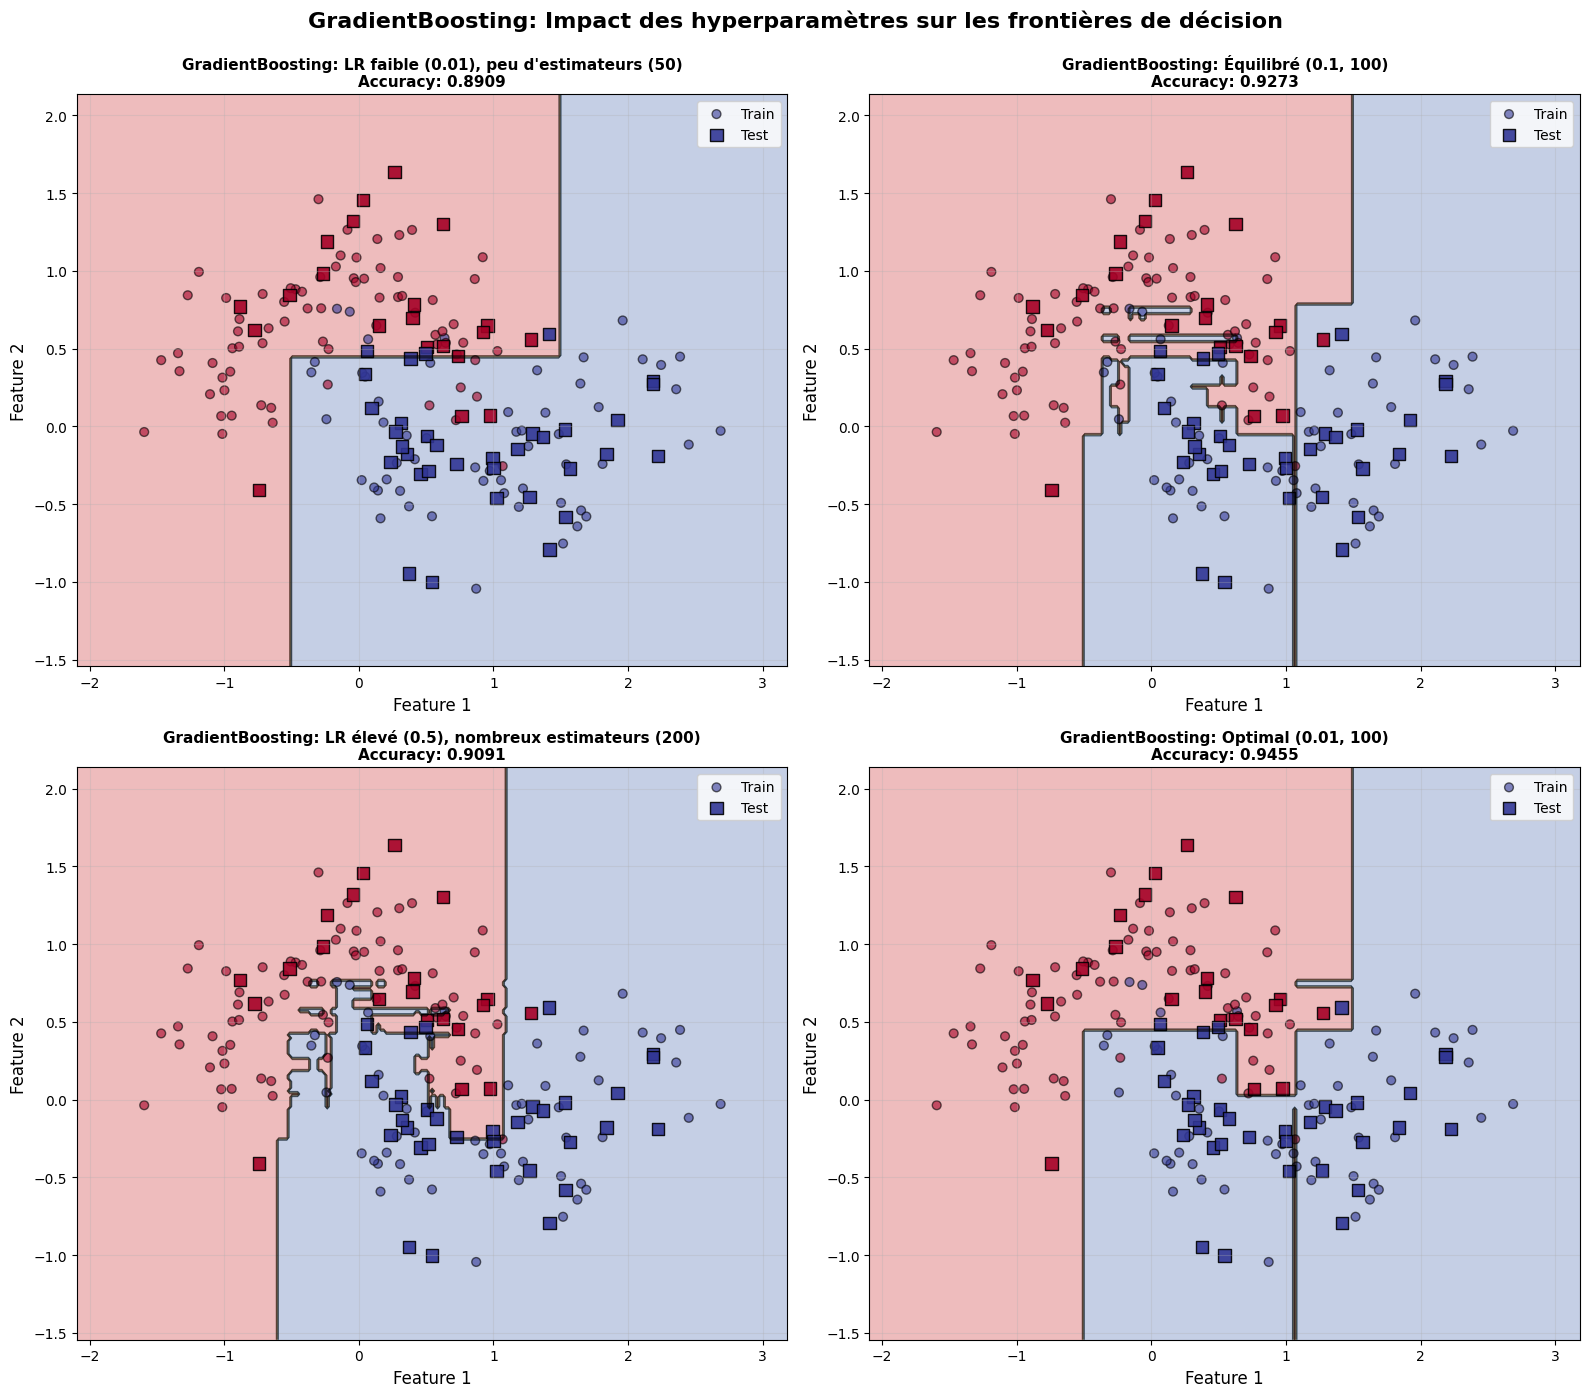

In [356]:
# Sélectionner 4 configurations intéressantes pour GradientBoosting
gb_configs_to_plot = [
    {'learning_rate': 0.01, 'n_estimators': 50, 'label': 'LR faible (0.01), peu d\'estimateurs (50)'},
    {'learning_rate': 0.1, 'n_estimators': 100, 'label': 'Équilibré (0.1, 100)'},
    {'learning_rate': 0.5, 'n_estimators': 200, 'label': 'LR élevé (0.5), nombreux estimateurs (200)'},
    {'learning_rate': gb_learning_rates[best_i_gb], 'n_estimators': gb_n_estimators[best_j_gb], 
     'label': f'Optimal ({gb_learning_rates[best_i_gb]}, {gb_n_estimators[best_j_gb]})'},
]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, config in enumerate(gb_configs_to_plot):
    model = GradientBoostingClassifier(
        learning_rate=config['learning_rate'],
        n_estimators=config['n_estimators'],
        max_depth=3,
        random_state=42
    )
    
    model.fit(X_train_dropped, y_train_dropped)
    y_pred = model.predict(X_test_dropped)
    accuracy = accuracy_score(y_test_dropped, y_pred)
    
    # Prédiction sur la grille
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    
    # Tracer les frontières de décision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    ax.scatter(X_train_dropped[:, 0], X_train_dropped[:, 1], c=y_train_dropped, 
               cmap='RdYlBu', edgecolor='black', s=40, alpha=0.6, label='Train')
    
    # Tracer les points de test
    ax.scatter(X_test_dropped[:, 0], X_test_dropped[:, 1], c=y_test_dropped, 
               cmap='RdYlBu', edgecolor='black', s=80, alpha=0.9, marker='s', label='Test')
    
    ax.set_xlabel('Feature 1', fontsize=12)
    ax.set_ylabel('Feature 2', fontsize=12)
    ax.set_title(f"GradientBoosting: {config['label']}\nAccuracy: {accuracy:.4f}", 
                 fontsize=11, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.suptitle('GradientBoosting: Impact des hyperparamètres sur les frontières de décision', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## 24. Comparaison finale des 3 modèles avec leurs meilleurs hyperparamètres

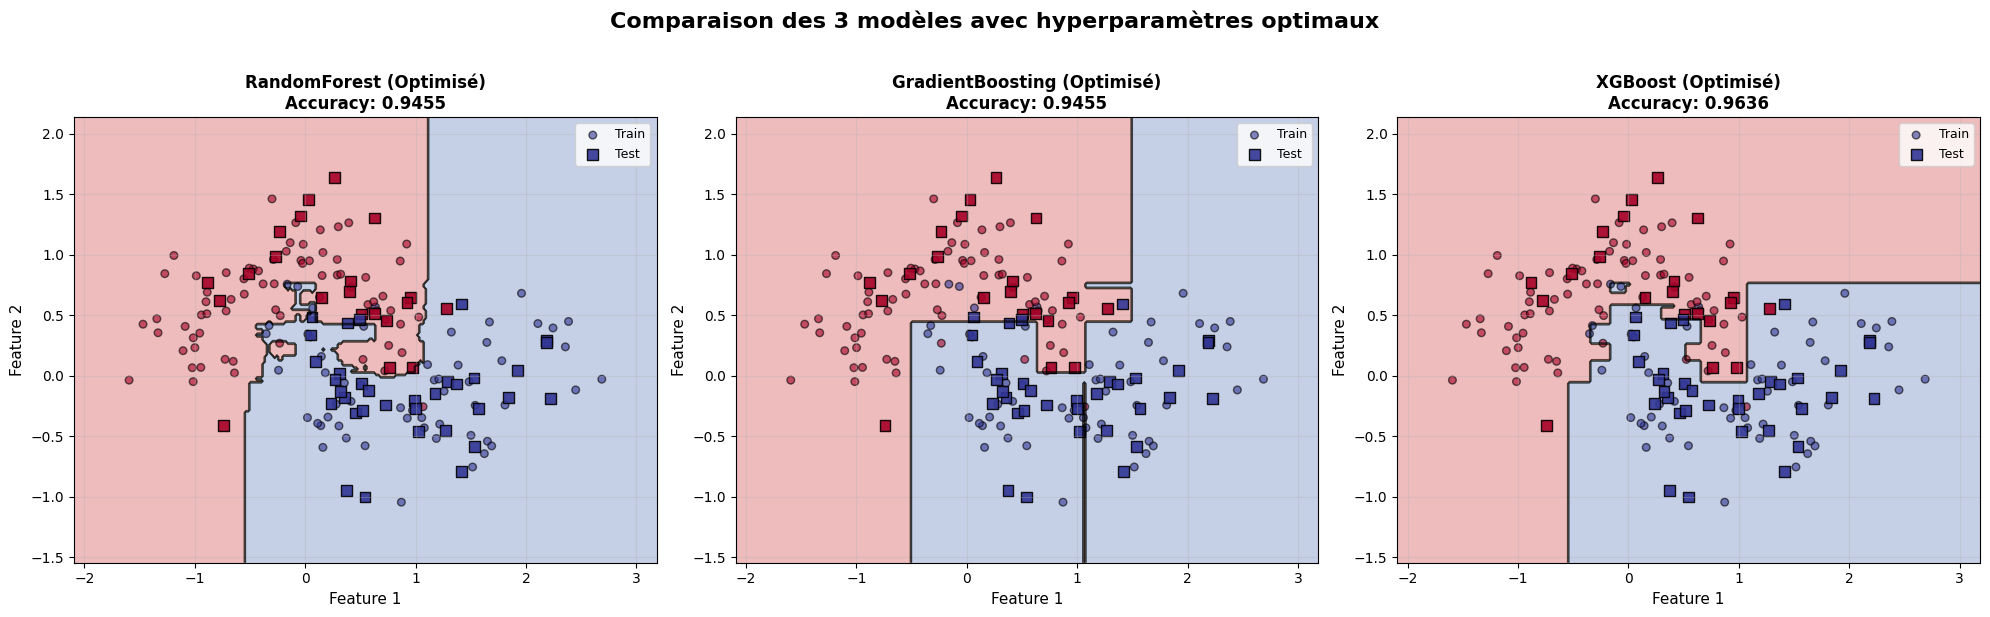

RÉSUMÉ DES PERFORMANCES OPTIMALES

RandomForest:
  n_estimators: 100, max_depth: 7
  Accuracy: 0.9455

GradientBoosting:
  learning_rate: 0.01, n_estimators: 100
  Accuracy: 0.9455

XGBoost:
  reg_alpha (L1): 0.5, reg_lambda (L2): 0.1
  Accuracy: 0.9636

🏆 MEILLEUR MODÈLE: XGBoost avec 0.9636 d'accuracy


In [357]:
# Créer les 3 modèles optimaux
optimal_models = {
    'RandomForest': RandomForestClassifier(
        n_estimators=rf_n_estimators[best_j],
        max_depth=rf_max_depth[best_i],
        random_state=42
    ),
    'GradientBoosting': GradientBoostingClassifier(
        learning_rate=gb_learning_rates[best_i_gb],
        n_estimators=gb_n_estimators[best_j_gb],
        max_depth=3,
        random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        reg_alpha=alpha_values[best_i],
        reg_lambda=lambda_values[best_j],
        random_state=42,
        eval_metric='logloss'
    )
}

# Entraîner et évaluer
optimal_accuracies = {}
for name, model in optimal_models.items():
    model.fit(X_train_dropped, y_train_dropped)
    y_pred = model.predict(X_test_dropped)
    optimal_accuracies[name] = accuracy_score(y_test_dropped, y_pred)

# Visualisation côte à côte
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, model) in enumerate(optimal_models.items()):
    # Prédiction sur la grille
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    ax = axes[idx]
    
    # Tracer les frontières de décision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)
    
    # Tracer les points d'entraînement
    ax.scatter(X_train_dropped[:, 0], X_train_dropped[:, 1], c=y_train_dropped, 
               cmap='RdYlBu', edgecolor='black', s=30, alpha=0.6, label='Train')
    
    # Tracer les points de test
    ax.scatter(X_test_dropped[:, 0], X_test_dropped[:, 1], c=y_test_dropped, 
               cmap='RdYlBu', edgecolor='black', s=60, alpha=0.9, marker='s', label='Test')
    
    ax.set_xlabel('Feature 1', fontsize=11)
    ax.set_ylabel('Feature 2', fontsize=11)
    ax.set_title(f'{name} (Optimisé)\nAccuracy: {optimal_accuracies[name]:.4f}', 
                 fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Comparaison des 3 modèles avec hyperparamètres optimaux', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("="*70)
print("RÉSUMÉ DES PERFORMANCES OPTIMALES")
print("="*70)
print(f"\nRandomForest:")
print(f"  n_estimators: {rf_n_estimators[best_j]}, max_depth: {rf_max_depth[best_i]}")
print(f"  Accuracy: {optimal_accuracies['RandomForest']:.4f}")

print(f"\nGradientBoosting:")
print(f"  learning_rate: {gb_learning_rates[best_i_gb]}, n_estimators: {gb_n_estimators[best_j_gb]}")
print(f"  Accuracy: {optimal_accuracies['GradientBoosting']:.4f}")

print(f"\nXGBoost:")
print(f"  reg_alpha (L1): {alpha_values[best_i]}, reg_lambda (L2): {lambda_values[best_j]}")
print(f"  Accuracy: {optimal_accuracies['XGBoost']:.4f}")

best_model = max(optimal_accuracies, key=optimal_accuracies.get)
print(f"\n{'='*70}")
print(f"🏆 MEILLEUR MODÈLE: {best_model} avec {optimal_accuracies[best_model]:.4f} d'accuracy")
print(f"{'='*70}")